In [427]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict

from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from statsmodels.stats.proportion import proportion_confint

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [428]:
banking_data = pd.read_csv('bank-full.csv')

In [429]:
#Check for banking information
banking_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [430]:
#Check for any nan values in data.
banking_data.isnull().values.any()
# There are no missing values in column.

False

In [431]:
banking_data.skew()

age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

In [432]:
#Let's see the banking_data shape and head and tail.
print(f'Num of rows == {banking_data.shape[0]} and Num of columns == {banking_data.shape[1]}')
banking_data.head(10)

Num of rows == 45211 and Num of columns == 17


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [433]:
banking_data.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [434]:
# First we convert all object to categorical type
for col in banking_data.columns:
    if banking_data[col].dtype == 'object':
        banking_data[col] = banking_data[col].astype('category')

In [435]:
banking_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null category
marital      45211 non-null category
education    45211 non-null category
default      45211 non-null category
balance      45211 non-null int64
housing      45211 non-null category
loan         45211 non-null category
contact      45211 non-null category
day          45211 non-null int64
month        45211 non-null category
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null category
Target       45211 non-null category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [436]:
#Generate descriptive statistics of banking data
banking_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,45211,NaN,NaN,NaN,40.9362,10.6188,18,33,39,48,95
job,45211,12,blue-collar,9732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,45211,3,married,27214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,45211,4,secondary,23202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,45211,2,no,44396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,45211,NaN,NaN,NaN,1362.27,3044.77,-8019,72,448,1428,102127
housing,45211,2,yes,25130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,45211,2,no,37967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,45211,3,cellular,29285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,45211,NaN,NaN,NaN,15.8064,8.32248,1,8,16,21,31


In [437]:
#Normalise function. Use this to remove skewness of data.
def normalise(column):
    upper = column.max()
    lower = column.min()
    normal = (column - lower)/(upper -lower)
    return normal

Univariate

Analysing Age

Skewness of age: 0.6848179257252598
Min age 18 and Max age 95


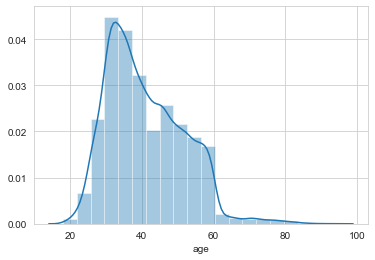

In [438]:
# Check for age distribution, 
sns.distplot(banking_data.age,bins=20)

#Let's check for skewness of age
print(f'Skewness of age: {banking_data.age.skew()}')

print(f'Min age {banking_data.age.min()} and Max age {banking_data.age.max()}')
# Age is positively skewed. And most of the age distributed within 20-60 age
# Almost distributed normally.
# Even though we can consider this.

descriptive statistics of age after applying log: 
count    45211.000000
mean         3.679433
std          0.254577
min          2.890372
25%          3.496508
50%          3.663562
75%          3.871201
max          4.553877
Name: age, dtype: float64


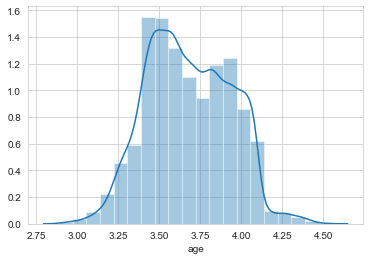

In [439]:
# Let's apply for np.log to 
print(f'descriptive statistics of age after applying log: \n{np.log(banking_data.age).describe().T}')
df = pd.DataFrame(np.log(banking_data.age),columns=['age'])
sns.distplot(df.age,bins=20)
# figure 1. show skewness of original age data 
# figure 2. show skewness of after aplying np.log to age data.

Min balance -8019 and Max balance 102127


8.360308326166326

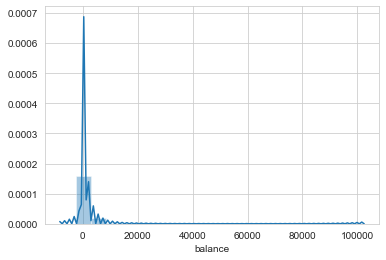

In [440]:
#Let's see the distribution of balance

sns.distplot(banking_data.balance,bins=20)
# We can see that, most of the balance is distributed within 0 to approximately 20K. 

print(f'Min balance {banking_data.balance.min()} and Max balance {banking_data.balance.max()}')

#Let's check skewness of balance
banking_data.balance.skew()

#Here, I can say, balance is skewed.

8.470445228391881

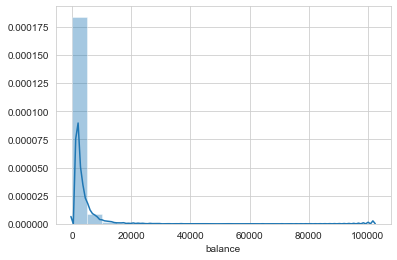

In [441]:
# Firstly I am asuming account balance can not be negative until it's credit card. 
# So replace all negative values with 0 zero.
banking_data.balance[banking_data.balance < 0] = 0
sns.distplot(banking_data.balance,bins=20)
banking_data.balance.skew()

Min balance 1 and Max balance 31


0.09307901402122411

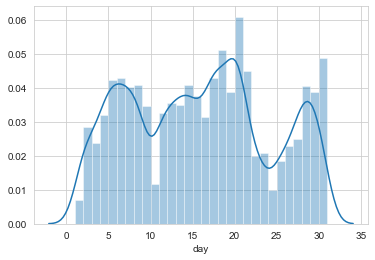

In [442]:
#Let's see the distribution of day

sns.distplot(banking_data.day,bins=30)
#Almost distributed normally

print(f'Min balance {banking_data.day.min()} and Max balance {banking_data.day.max()}')

#Let's check skewness of day
banking_data.day.skew()

Min duration 0 and Max duration 4918


3.144318099423456

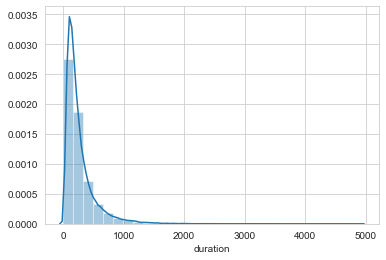

In [443]:
#Let's see the distribution of duration.

sns.distplot(banking_data.duration,bins=30)
# We can see that, most of the duration is distributed within 0 to approximately 1000 seconds

print(f'Min duration {banking_data.duration.min()} and Max duration {banking_data.duration.max()}')

#Let's check skewness of duration
banking_data.duration.skew()

# And this duration is positively skewed. 

In [444]:
#This is to verify, if duration is 0 waht would be the target.
banking_data[banking_data.duration == 0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
6424,53,management,married,primary,no,351,yes,no,unknown,27,may,0,4,-1,0,unknown,no
22937,35,technician,married,secondary,no,5535,no,no,cellular,26,aug,0,15,-1,0,unknown,no
36425,31,entrepreneur,married,secondary,no,162,yes,yes,cellular,11,may,0,2,-1,0,unknown,no


Min campaign 1 and Max campaign 63


3.144318099423456

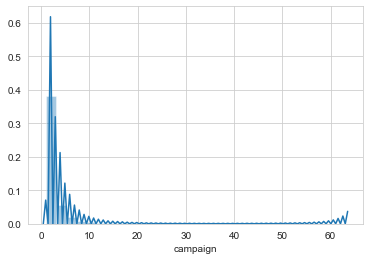

In [445]:
#Let's see the distribution of campaign.

sns.distplot(banking_data.campaign,bins=30)
# We can see that, most of the campaign is distributed within 0 to approximately 1000 seconds

print(f'Min campaign {banking_data.campaign.min()} and Max campaign {banking_data.campaign.max()}')

#Let's check skewness of campaign
banking_data.duration.skew()

# And this campaign is positively skewed.

Min pdays -1 and Max campaign 871
2.6157154736563477


pdays  Target
-1     no        33570
       yes        3384
 1     no            9
       yes           6
 2     no           35
       yes           2
 3     no            1
 4     no            1
       yes           1
 5     no           11
 6     no            9
       yes           1
 7     no            7
 8     no           25
 9     no            9
       yes           3
 10    yes           4
       no            2
 12    no            7
 13    no            3
       yes           3
 14    no            8
       yes           1
 15    no            3
 17    no            3
       yes           1
 18    no            1
 19    no            2
 20    no            1
       yes           1
                 ...  
 728   yes           1
 745   no            1
 749   yes           1
 756   no            1
 760   no            1
 761   yes           1
 769   yes           1
 771   no            1
 772   no            1
 774   no            1
 775   no            1
 776   yes          

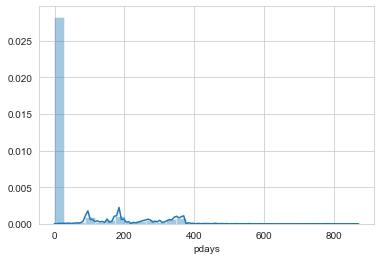

In [446]:
#Let's see the distribution of pdays.

sns.distplot(banking_data.pdays,bins=30)
# We can see that, most of the pdays is distributed with -1

print(f'Min pdays {banking_data.pdays.min()} and Max campaign {banking_data.pdays.max()}')

#Let's check skewness of pdays
print(banking_data.pdays.skew())

# And this pdays is positively skewed.

#check how pdays data are distributted with Target.
banking_data.groupby('pdays')['Target'].value_counts()

In [447]:
# After seeing the distribution of pdays with Target, most of the data lies in -1.
# And here, I'm assuming that there can not be -1 pdays. Either pdays has to 0 'zero' or not previously contacted.
# So we replace -1 with 999 as not contacted.

def replacePdays_lessThan_0(df):
    df = df
    replaceValue = 999
    df.pdays[df.pdays == -1] = replaceValue
    df.pdays = df.pdays.astype(int)
    return df
banking_data = replacePdays_lessThan_0(banking_data)
# Unique vales of Experience after replacing with mean.
banking_data.pdays.unique()

array([999, 151, 166,  91,  86, 143, 147,  89, 140, 176, 101, 174, 170,
       167, 195, 165, 129, 188, 196, 172, 118, 119, 104, 171, 117, 164,
       132, 131, 123, 159, 186, 111, 115, 116, 173, 178, 110, 152,  96,
       103, 150, 175, 193, 181, 185, 154, 145, 138, 126, 180, 109, 158,
       168,  97, 182, 127, 130, 194, 125, 105, 102,  26, 179,  28, 183,
       155, 112, 120, 137, 124, 187, 190, 113, 162, 134, 169, 189,   8,
       144, 191, 184, 177,   5,  99, 133,  93,  92,  10, 100, 156, 198,
       106, 153, 146, 128,   7, 121, 160, 107,  90,  27, 197, 136, 139,
       122, 157, 149, 135,  30, 114,  98, 192, 163,  34,  95, 141,  31,
       199,  94, 108,  29, 268, 247, 253, 226, 244, 239, 245, 204, 231,
       238, 258, 230, 254, 265,  71, 223, 246, 250, 266, 240, 205, 261,
       259, 241, 260, 234, 251, 225, 161, 237, 262, 248, 255, 220, 227,
       206, 224, 249, 235, 228, 263,   2, 270, 232, 252, 207, 200, 269,
       233, 256, 273, 272, 242, 264, 208, 214, 222, 271, 203, 22

Min previous 0 and Max previous 4918


41.84645447266292

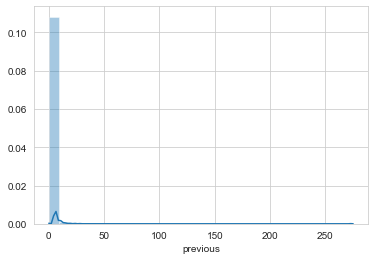

In [448]:
#Let's see the distribution of previous.

sns.distplot(banking_data.previous,bins=30)
# We can see that,most of the previous is distributed with 0. Means most of the time not contacted before the campaign.

print(f'Min previous {banking_data.previous.min()} and Max previous {banking_data.duration.max()}')

#Let's check skewness of duration
banking_data.previous.skew()

# And this duration is positively skewed. 

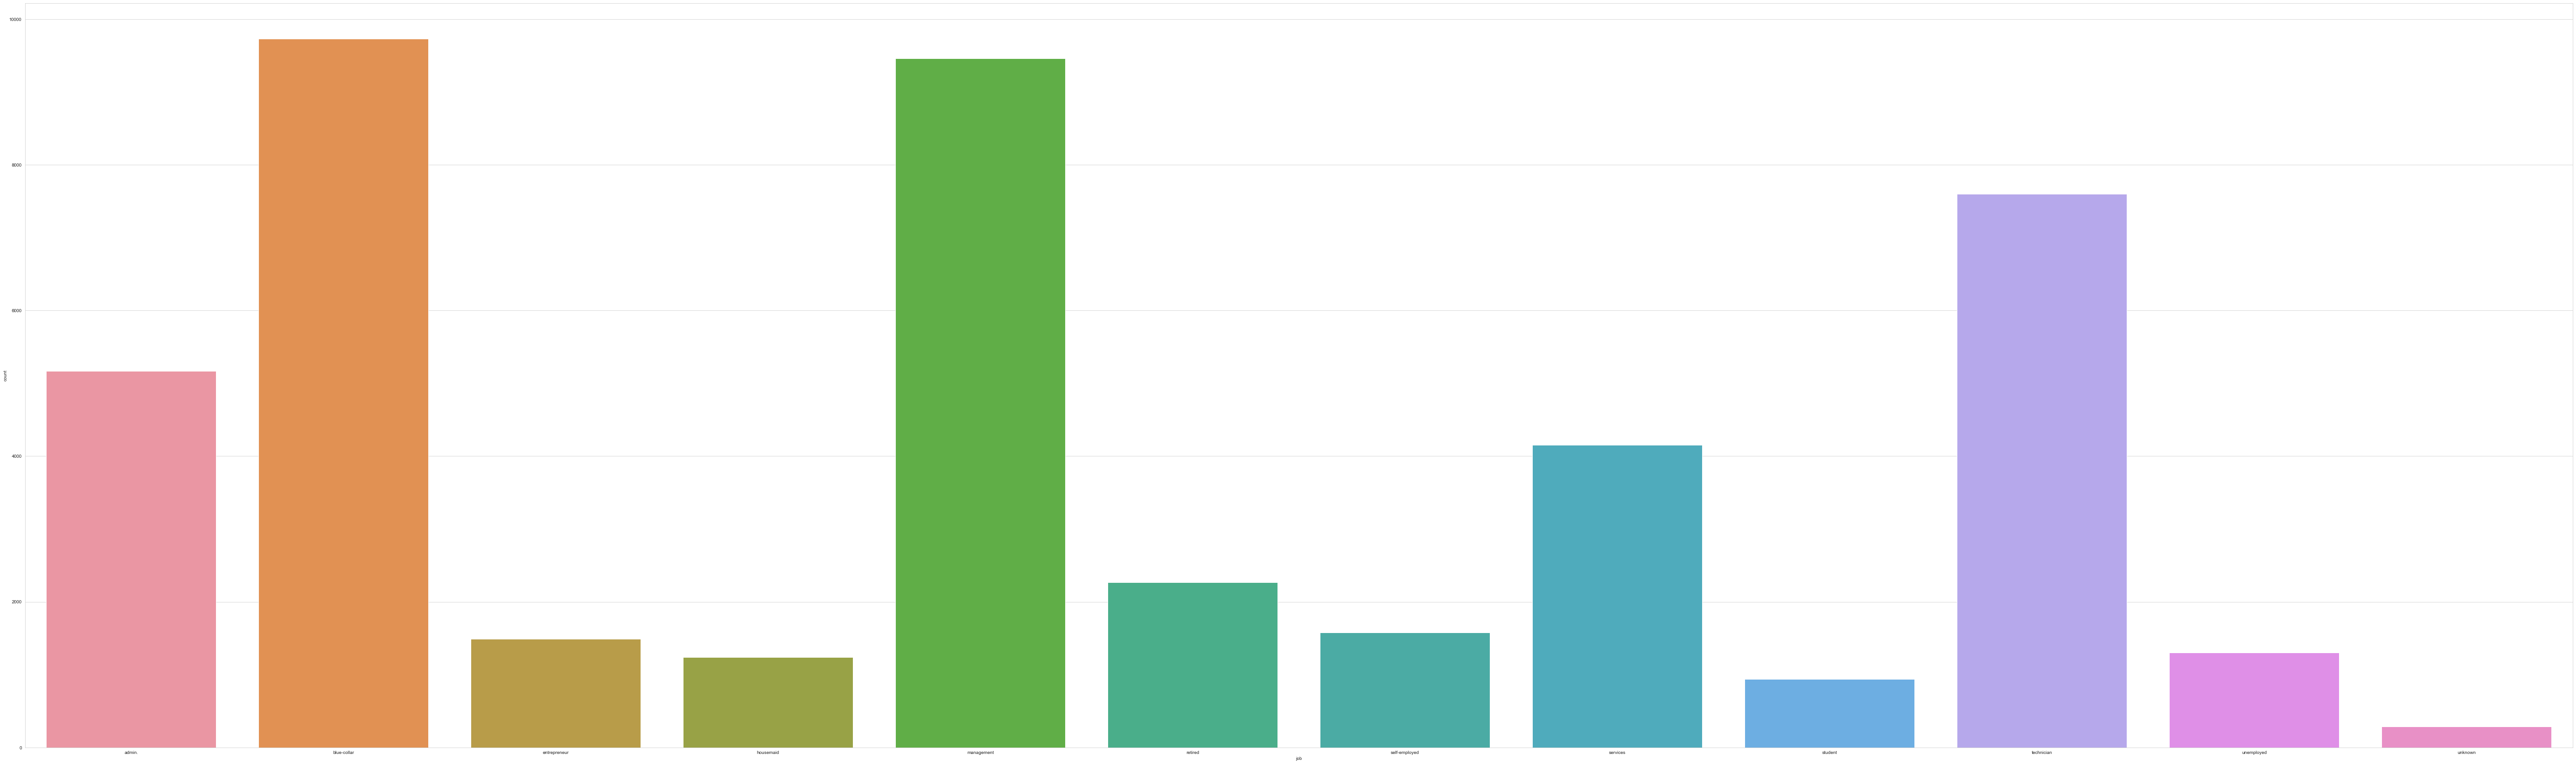

In [449]:
# Let's check the job distribution
plt.figure(figsize=(100,30))
sns.countplot(banking_data.job)

In [450]:
job_cat_name = np.array(banking_data.job.unique())
print(job_cat_name)

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']


In [451]:
for job_name in job_cat_name:
    print(f'job name:{job_name} -- {len(banking_data.loc[banking_data.job == job_name])} ({np.round(len(banking_data.loc[banking_data.job == job_name])/len(banking_data.index) * 100,2)}%)')

job name:management -- 9458 (20.92%)
job name:technician -- 7597 (16.8%)
job name:entrepreneur -- 1487 (3.29%)
job name:blue-collar -- 9732 (21.53%)
job name:unknown -- 288 (0.64%)
job name:retired -- 2264 (5.01%)
job name:admin. -- 5171 (11.44%)
job name:services -- 4154 (9.19%)
job name:self-employed -- 1579 (3.49%)
job name:unemployed -- 1303 (2.88%)
job name:housemaid -- 1240 (2.74%)
job name:student -- 938 (2.07%)


In [452]:
banking_data.groupby('job').Target.value_counts()

job            Target
admin.         no        4540
               yes        631
blue-collar    no        9024
               yes        708
entrepreneur   no        1364
               yes        123
housemaid      no        1131
               yes        109
management     no        8157
               yes       1301
retired        no        1748
               yes        516
self-employed  no        1392
               yes        187
services       no        3785
               yes        369
student        no         669
               yes        269
technician     no        6757
               yes        840
unemployed     no        1101
               yes        202
unknown        no         254
               yes         34
Name: Target, dtype: int64

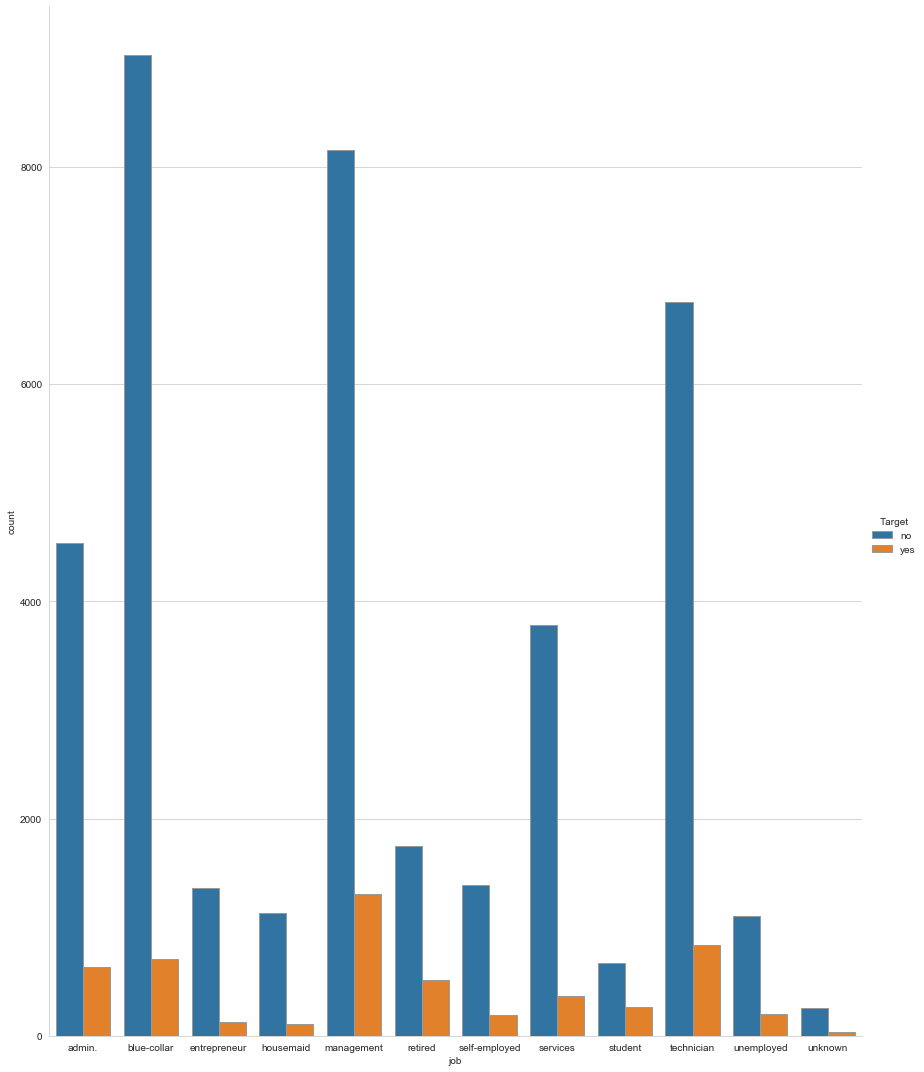

In [453]:
sns.catplot('job',hue='Target',kind='count', edgecolor='.6',data=banking_data,height=15,aspect=0.8)

In [454]:
# df = banking_data
# df['job'] = df.job.replace('unknown','student')
# df.job.value_counts()

In [455]:
# sns.catplot('job',hue='Target',kind='count', edgecolor='.6',data=df,height=15,aspect=0.8)

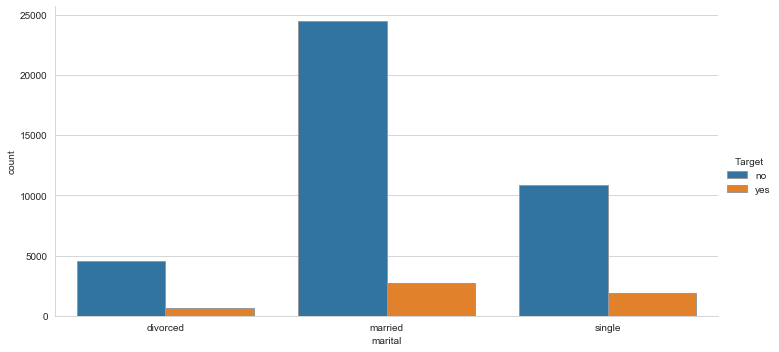

In [456]:
sns.catplot('marital',hue='Target',kind='count', edgecolor='.6',data=banking_data,height=5,aspect=2.0)

* Here we can see that, most of the distributted in married  category
* This means,we can say that, bank has conatcted to married people. In that very less people subscribed for the product.

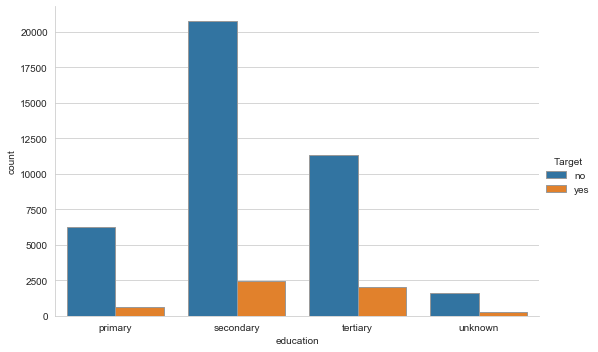

In [457]:
sns.catplot('education',hue='Target',kind='count', edgecolor='.6',data=banking_data,height=5,aspect=1.5)

In [458]:
for col in banking_data.education.unique():
    print(f'column name :{col} -- {len(banking_data.loc[banking_data.education == col])} ({np.round(len(banking_data.loc[banking_data.education == col])/len(banking_data.index) * 100,2)}%)')

column name :tertiary -- 13301 (29.42%)
column name :secondary -- 23202 (51.32%)
column name :unknown -- 1857 (4.11%)
column name :primary -- 6851 (15.15%)


* Here we can see that, most of the distributted in secondary and tertiary  education category.
* This means,we can say that, bank has conatcted to educated people. In that very less people subscribed for the product.

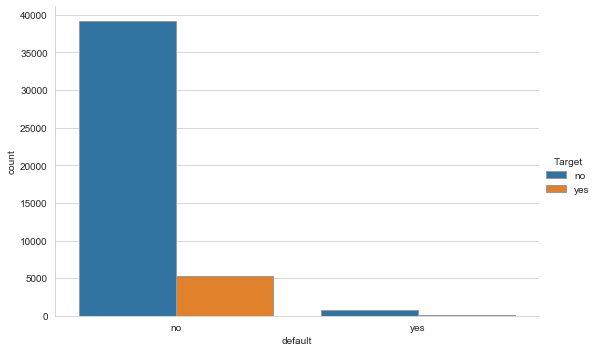

In [459]:
sns.catplot('default',hue='Target',kind='count', edgecolor='.6',data=banking_data,height=5,aspect=1.5)

In [460]:
banking_data.default.unique()

[no, yes]
Categories (2, object): [no, yes]

In [461]:
for val in banking_data.default.unique():
    print(f'column name :{val} -- {len(banking_data.loc[banking_data.default == val])} ({np.round(len(banking_data.loc[banking_data.default == val])/len(banking_data.index) * 100,2)}%)')
    

column name :no -- 44396 (98.2%)
column name :yes -- 815 (1.8%)


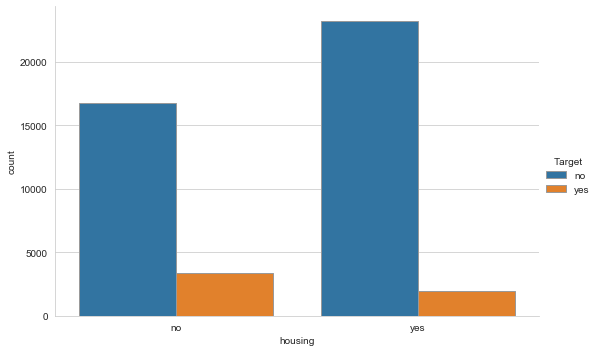

In [462]:
sns.catplot('housing',hue='Target',kind='count', edgecolor='.6',data=banking_data,height=5,aspect=1.5)

* Here, we can see that, almost data distributted normaly.
* The bank has contected to people who has housing loan.
* And customers who does not have hosuing loan, have subscribed for the product.

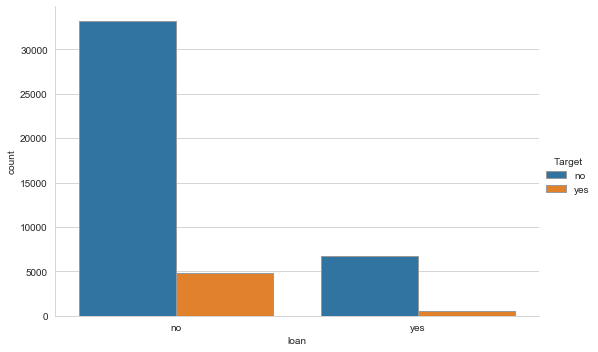

In [463]:
sns.catplot('loan',hue='Target',kind='count', edgecolor='.6',data=banking_data,height=5,aspect=1.5)

* The bank has contacted to people who does not have personal loan.

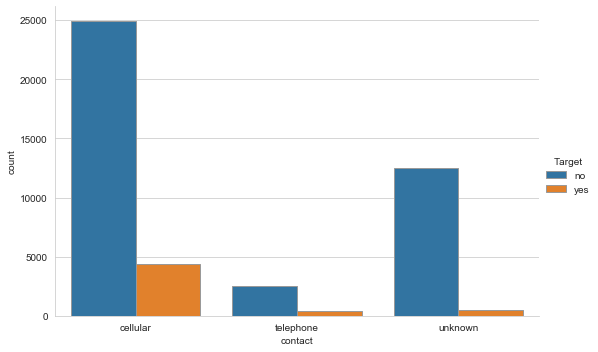

In [464]:
sns.catplot('contact',hue='Target',kind='count', edgecolor='.6',data=banking_data,height=5,aspect=1.5)

* The bank has contacted to people through cellular
* And very less customers have opted/subscribed.

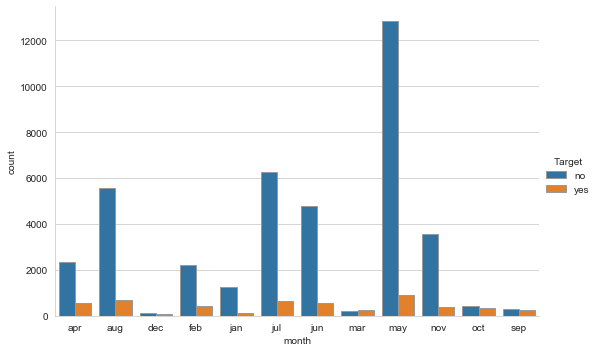

In [465]:
sns.catplot('month',hue='Target',kind='count', edgecolor='.6',data=banking_data,height=5,aspect=1.5)

* Maximum contacts have made in the month of may.But very less subscriptio have made.
* But, in the month of oct, sep, mar and dec , thae bank has made very contacts but most of the customer have made subcription.

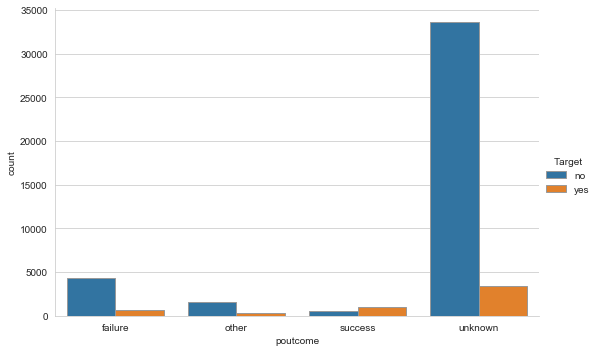

In [466]:
sns.catplot('poutcome',hue='Target',kind='count', edgecolor='.6',data=banking_data,height=5,aspect=1.5,)

* Here, we can combine unkown and other categroy data, and dervie new category as 'nonexistent'.

In [467]:
# Let's  check count of each categorical feature.
print(banking_data.job.value_counts())
print(banking_data.contact.value_counts())
print(banking_data.marital.value_counts())
print(banking_data.education.value_counts())
print(banking_data.default.value_counts())
print(banking_data.housing.value_counts())
print(banking_data.loan.value_counts())
print(banking_data.month.value_counts())
print(banking_data.poutcome.value_counts())
print(banking_data.Target.value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64
n

In [468]:
# Let's do oneHotEncoding to 'marital' ,'contact' ,'loan', 'housing' and 'default'
oneHot_cols = ['marital' ,'contact']
banking_data = pd.get_dummies(banking_data,columns=oneHot_cols)

In [469]:
banking_data.head()

,age,job,education,default,balance,housing,loan,day,month,duration,...,pdays,previous,poutcome,Target,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown
0,58,management,tertiary,no,2143,yes,no,5,may,261,...,999,0,unknown,no,0,1,0,0,0,1
1,44,technician,secondary,no,29,yes,no,5,may,151,...,999,0,unknown,no,0,0,1,0,0,1
2,33,entrepreneur,secondary,no,2,yes,yes,5,may,76,...,999,0,unknown,no,0,1,0,0,0,1
3,47,blue-collar,unknown,no,1506,yes,no,5,may,92,...,999,0,unknown,no,0,1,0,0,0,1
4,33,unknown,unknown,no,1,no,no,5,may,198,...,999,0,unknown,no,0,0,1,0,0,1


In [470]:
banking_data.poutcome = banking_data.poutcome.replace(['unknown','other'],'nonexistent')

In [471]:
banking_data.poutcome.unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [472]:
replaceWith = {
                "job": {"blue-collar": 1, "management": 2 ,"technician": 3 ,"admin.":4,"services":5,"retired":6,"self-employed":7,"entrepreneur":8,"unemployed":9,"student":10,"housemaid":11,"unknown":0},
                "education": {"secondary": 1, "tertiary": 2 ,"primary":3,"unknown":0},
                "month": {"may": 1, "jul": 2 ,"aug": 3 ,"jun":4,"nov":5,"apr":6,"feb":7,"jan":8,"oct":9,"sep":10,"mar":11,"dec":12},
                "poutcome":{"nonexistent": 1, "failure": 2 ,"success": 3},
                "Target": {"no":0,"yes":1},
                "housing": {"no":2,"yes":1},
                "default": {"no":2,"yes":1},
                "loan": {"no":2,"yes":1}
                }

In [473]:
banking_data = banking_data.replace(replaceWith)

In [474]:
banking_data.head()

,age,job,education,default,balance,housing,loan,day,month,duration,...,pdays,previous,poutcome,Target,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown
0,58,2,2,2,2143,1,2,5,1,261,...,999,0,1,0,0,1,0,0,0,1
1,44,3,1,2,29,1,2,5,1,151,...,999,0,1,0,0,0,1,0,0,1
2,33,8,1,2,2,1,1,5,1,76,...,999,0,1,0,0,1,0,0,0,1
3,47,1,0,2,1506,1,2,5,1,92,...,999,0,1,0,0,1,0,0,0,1
4,33,0,0,2,1,2,2,5,1,198,...,999,0,1,0,0,0,1,0,0,1


In [475]:
banking_data.tail()

,age,job,education,default,balance,housing,loan,day,month,duration,...,pdays,previous,poutcome,Target,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown
45206,51,3,2,2,825,2,2,17,5,977,...,999,0,1,1,0,1,0,1,0,0
45207,71,6,3,2,1729,2,2,17,5,456,...,999,0,1,1,1,0,0,1,0,0
45208,72,6,1,2,5715,2,2,17,5,1127,...,184,3,3,1,0,1,0,1,0,0
45209,57,1,1,2,668,2,2,17,5,508,...,999,0,1,0,0,1,0,0,1,0
45210,37,8,1,2,2971,2,2,17,5,361,...,188,11,1,0,0,1,0,1,0,0


In [476]:
banking_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 21 columns):
age                  45211 non-null int64
job                  45211 non-null int64
education            45211 non-null int64
default              45211 non-null int64
balance              45211 non-null int64
housing              45211 non-null int64
loan                 45211 non-null int64
day                  45211 non-null int64
month                45211 non-null int64
duration             45211 non-null int64
campaign             45211 non-null int64
pdays                45211 non-null int64
previous             45211 non-null int64
poutcome             45211 non-null int64
Target               45211 non-null int64
marital_divorced     45211 non-null uint8
marital_married      45211 non-null uint8
marital_single       45211 non-null uint8
contact_cellular     45211 non-null uint8
contact_telephone    45211 non-null uint8
contact_unknown      45211 non-null uint8
dtypes: i

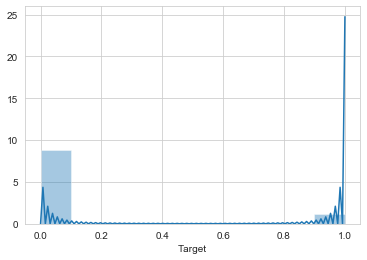

In [477]:
sns.distplot(banking_data.Target,bins=10)

In [478]:
print(f'no data: {len(banking_data.Target[banking_data.Target == 0])} ({np.round(len(banking_data.Target[banking_data.Target == 0])/len(banking_data.index)*100,2)})%')
print(f'yes data: {len(banking_data.Target[banking_data.Target == 1])} ({np.round(len(banking_data.Target[banking_data.Target == 1])/len(banking_data.index)*100,2)})%')

no data: 39922 (88.3)%
yes data: 5289 (11.7)%


* As we can see data is not distributed properly.
* Data is imbalanced.
* So we use over sampling technique to ovecome this propblem

Target
0    [[AxesSubplot(0.125,0.758226;0.158163x0.121774...
1    [[AxesSubplot(0.125,0.758226;0.158163x0.121774...
dtype: object

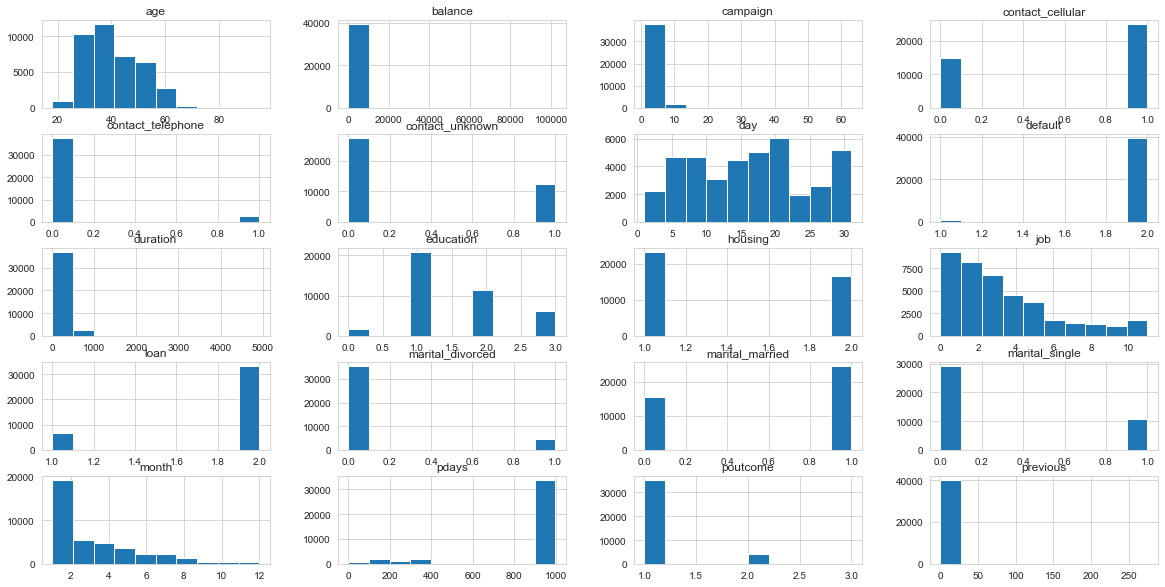

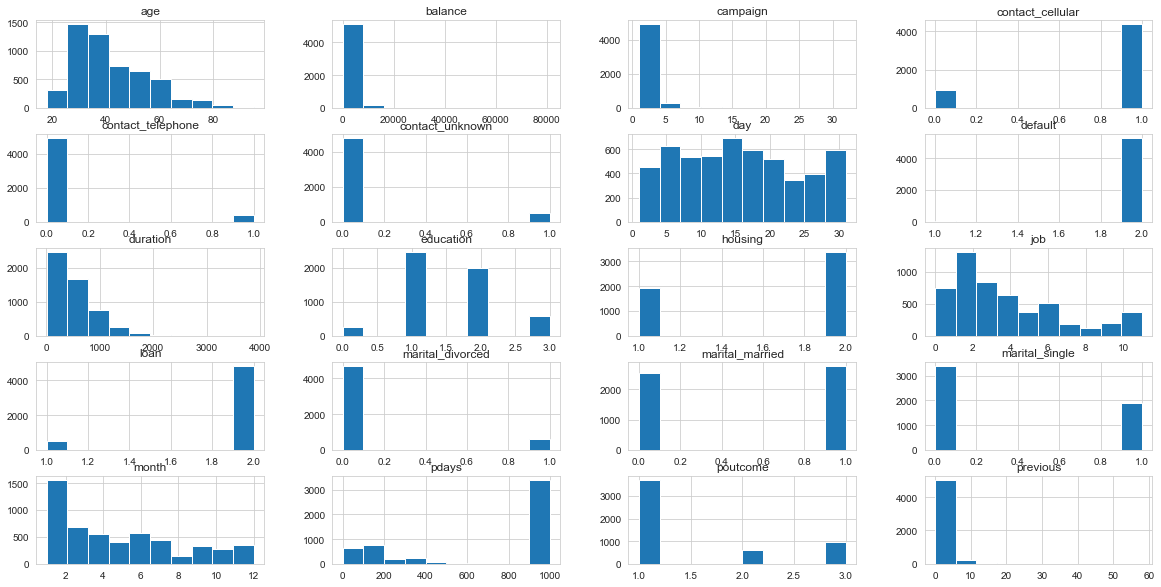

In [479]:
banking_data.groupby('Target').hist(figsize=(20,10))

* First half of the above hist graph shows distribution of 'Target' 0 'Zero' accross feature columns
* And second half of the above hist graph shows distribution of 'Target' 1 'One' accross feature columns
* We can see that month is normaly distributted in "Target=1" but positively skewed in "Targte =0".
* And 'day'and 'age' almost normaly distributted in both cases.

In [480]:
corr = banking_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,Target,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown
age,1,0.0767952,0.112785,0.0178793,0.0977298,0.185513,0.0156553,-0.00912005,0.0897167,-0.00464843,0.00476031,-0.00880435,0.00128832,0.0244446,0.025155,0.164674,0.286257,-0.427817,-0.0683752,0.170349,-0.0201317
job,0.0767952,1,-0.0514273,3.04066e-05,0.0155802,0.152008,0.0222489,-0.00588588,0.10732,0.0066773,-0.0296969,-0.0154171,-0.00139554,0.0219902,0.0549268,0.0309429,-0.0525138,0.0351407,0.0276392,0.0559037,-0.0594329
education,0.112785,-0.0514273,1,0.00696257,0.0306795,0.0353375,0.0250332,-0.005209,0.0143642,-0.00262,0.0146243,0.0137319,0.000110981,-0.0116009,-0.00135902,-0.00785168,0.0701239,-0.0706454,-0.006004,0.0302559,-0.0100528
default,0.0178793,3.04066e-05,0.00696257,1,0.0571124,-0.00602522,0.0772342,-0.0094239,0.0337313,0.0100215,-0.0168215,-0.0404532,0.0183294,0.036096,0.022419,-0.0177769,0.0144596,-0.0031152,0.0100611,0.017208,-0.0199329
balance,0.0977298,0.0155802,0.0306795,0.0571124,1,0.0652794,0.0795323,0.00578842,0.0899373,0.0213248,-0.0141642,-0.0359409,0.0160181,0.0341683,0.0513697,-0.0209529,0.0263061,-0.0137388,0.0145788,0.0369933,-0.0354141
housing,0.185513,0.152008,0.0353375,-0.00602522,0.0652794,1,0.0413229,0.0279816,0.270254,-0.00507545,0.0235987,0.0400954,-0.0370761,-0.000783702,0.139173,-0.00177803,-0.0176807,0.0204755,0.156071,0.0808222,-0.208409
loan,0.0156553,0.0222489,0.0250332,0.0772342,0.0795323,0.0413229,1,-0.0113702,0.0600785,0.012412,-0.00997985,-0.0322543,0.0110435,0.043474,0.068185,-0.0163768,-0.0369056,0.0517159,-0.0136039,0.0131832,0.00721056
day,-0.00912005,-0.00588588,-0.005209,-0.0094239,0.00578842,0.0279816,-0.0113702,1,-0.0380195,-0.0302063,0.16249,0.0790737,-0.0517105,-0.0701618,-0.0283478,-0.000433111,0.00710237,-0.00741185,0.0201858,0.0236522,-0.0341035
month,0.0897167,0.10732,0.0143642,0.0337313,0.0899373,0.270254,0.0600785,-0.0380195,1,0.0140972,-0.0938288,-0.249568,0.124014,0.208377,0.20703,-0.0128022,-0.0237989,0.0349382,0.263902,0.0779596,-0.320607
duration,-0.00464843,0.0066773,-0.00262,0.0100215,0.0213248,-0.00507545,0.012412,-0.0302063,0.0140972,1,-0.0845695,-0.00509019,0.00120306,0.0203453,0.394521,0.00609989,-0.0226829,0.0203284,0.0255429,-0.0232011,-0.0143792


##### As we can see that, there is very less correlations in between features.

* As I can see correlations between features are
* Age-marital_married = 0.286
* Age-marital_divorced = 0.16
* Age-Education = 0.112
* Previous-Month = 0.124
* poutcome-Month = 0.2
* poutcome-previous = 0.39
* contact_cellular-Month = 0.2639
* contact_telephone-Age = 0.17
* contact-poutcome = 0.218
* contact_unkown-housing = 0.208
* contact_unkown-pdays = 0.29

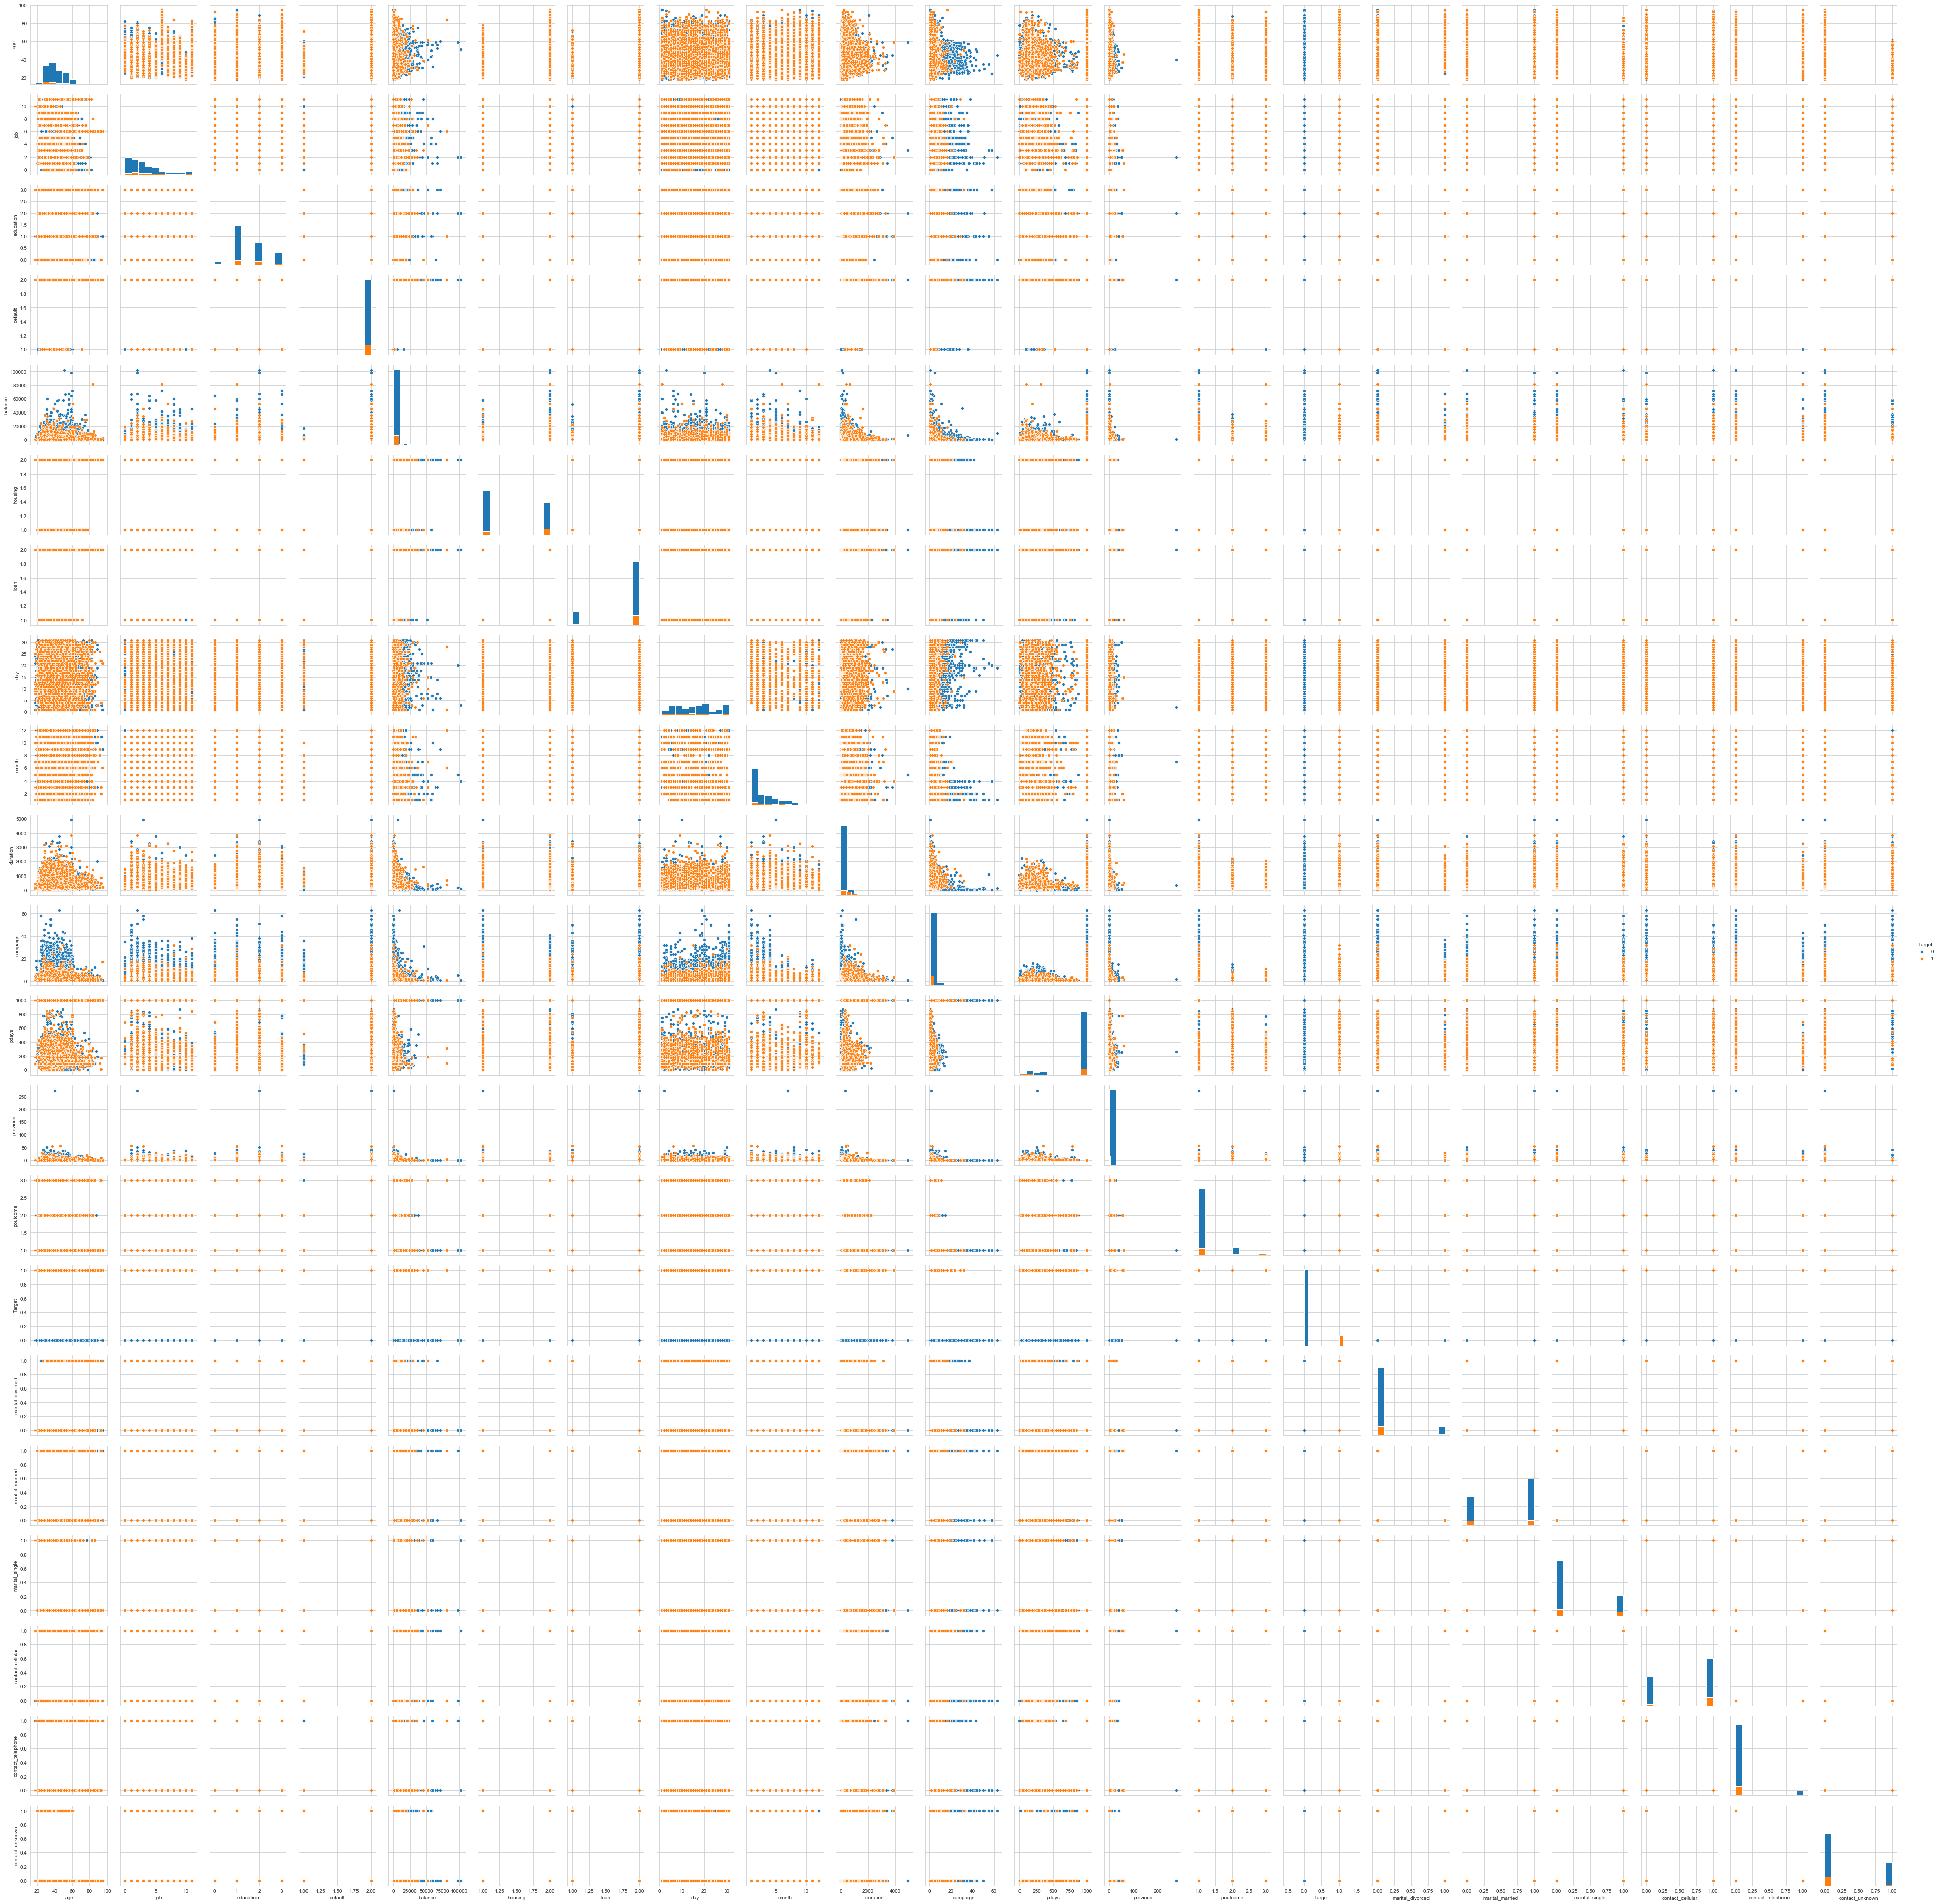

In [55]:
sns.pairplot(banking_data,hue='Target',diag_kind='hist',)

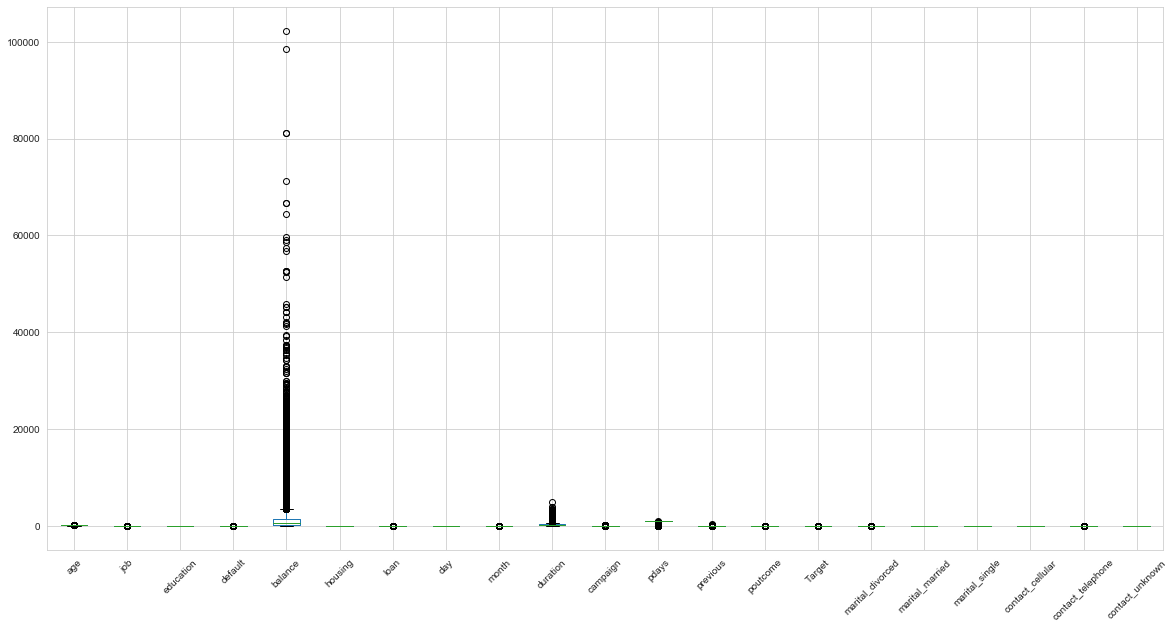

In [56]:
banking_data.boxplot(figsize=(20,10),rot=45)

In [57]:
from scipy.stats import chi2_contingency,chi2

In [58]:
df = banking_data.drop(columns=['balance']) # can not expects -ve values, so dropping banlance

In [59]:
cols = ['job','marital_single','default','loan']

In [60]:
banking_data.columns

Index(['age', 'job', 'education', 'default', 'balance', 'housing', 'loan',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'Target', 'marital_divorced', 'marital_married', 'marital_single',
       'contact_cellular', 'contact_telephone', 'contact_unknown'],
      dtype='object')

In [61]:
banking_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 21 columns):
age                  45211 non-null int64
job                  45211 non-null int64
education            45211 non-null int64
default              45211 non-null int64
balance              45211 non-null int64
housing              45211 non-null int64
loan                 45211 non-null int64
day                  45211 non-null int64
month                45211 non-null int64
duration             45211 non-null int64
campaign             45211 non-null int64
pdays                45211 non-null int64
previous             45211 non-null int64
poutcome             45211 non-null int64
Target               45211 non-null int64
marital_divorced     45211 non-null uint8
marital_married      45211 non-null uint8
marital_single       45211 non-null uint8
contact_cellular     45211 non-null uint8
contact_telephone    45211 non-null uint8
contact_unknown      45211 non-null uint8
dtypes: i

In [62]:
chi, pval, dof, exp = chi2_contingency(banking_data[cols])
print('p-value is: ', pval)
significance = 0.05
p = 1 - significance
critical_value = chi2.ppf(p, dof)
print('chi=%.6f, critical value=%.6f\n' % (chi, critical_value))
if chi > critical_value:
    print("""At %.2f level of significance(alpha), we reject the null hypotheses and accept H1. 
They are not independent.""" % (significance))
else:
    print("""At %.2f level of significance(alpha), we accept the null hypotheses. 
They are independent.""" % (significance))


p-value is:  1.0
chi=73776.397108, critical value=136487.818495

At 0.05 level of significance(alpha), we accept the null hypotheses. 
They are independent.


In [63]:
print('p-value=%.6f, significance=%.2f\n' % (pval, significance))
if pval < significance:
    print("""At %.2f level of significance(alpha), we reject the null hypotheses and accept H1. 
They are not independent.""" % (significance))
else:
    print("""At %.2f level of significance(alpha), we accept the null hypotheses. 
They are independent.""" % (significance))


p-value=1.000000, significance=0.05

At 0.05 level of significance(alpha), we accept the null hypotheses. 
They are independent.


* As the Chi-Square p-value is greater than alpha and chi is lesser than critical_value.
* So we accept that those all categorical variables are independent. 
* So we can drop all of these features ('job','marital_single','default' and'loan').

In [100]:
final_df = banking_data.drop(columns=cols)

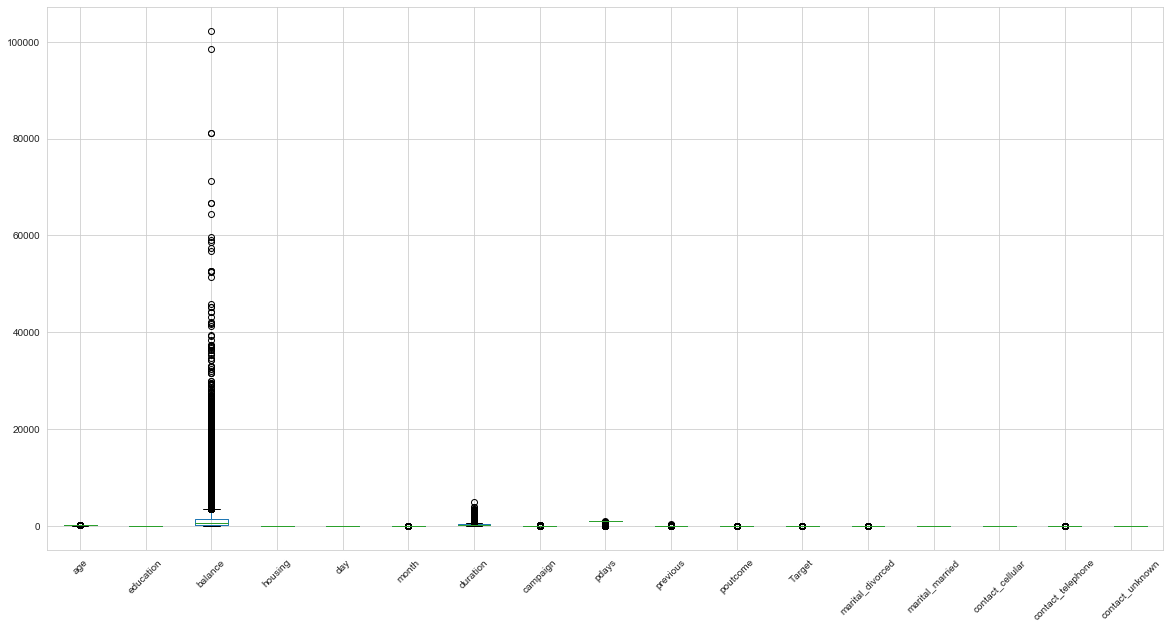

In [101]:
#After removing/dropping indenpendent variables.
# Lets check for outliers from newly formed data.
final_df.boxplot(figsize=(20,10),rot=45)

* As we can see, most of the data contains outliers.
* In which balance has lots of ouliers. Let's check them individually/ one by one.
* I go with IQR for handling outliers. Bys using capping method 5th and 95th percentile.

In [102]:
final_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
education,45211.0,1.556192,0.795030,0.0,1.0,1.0,2.0,3.0
balance,45211.0,1388.734069,3029.530442,0.0,72.0,448.0,1428.0,102127.0
housing,45211.0,1.444162,0.496878,1.0,1.0,1.0,2.0,2.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
month,45211.0,3.430957,2.494990,1.0,1.0,3.0,5.0,12.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,857.565283,303.245691,1.0,999.0,999.0,999.0,999.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


max of balance where target is 1 : 81204
max of balance where target is 0 : 102127
min of balance where target is 1 : 0
min of balance where target is 0 : 0
Describe : 
count     45211.000000
mean       1388.734069
std        3029.530442
min           0.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64


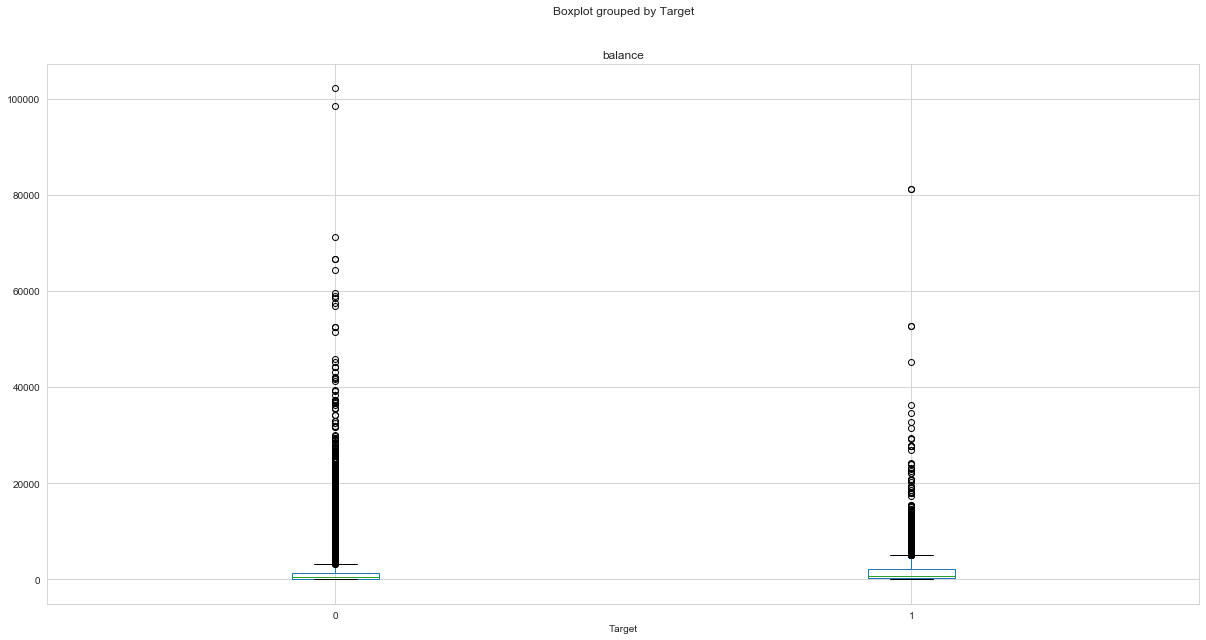

In [103]:
# let's check outlier in balance feature
final_df.boxplot(by='Target',column=['balance'],figsize=(20,10))
print(f'max of balance where target is 1 : {final_df.balance[final_df.Target == 1].max()}')
print(f'max of balance where target is 0 : {final_df.balance[final_df.Target == 0].max()}')
print(f'min of balance where target is 1 : {final_df.balance[final_df.Target == 1].min()}')
print(f'min of balance where target is 0 : {final_df.balance[final_df.Target == 0].min()}')
print(f'Describe : \n{final_df.balance.describe()}')

In [104]:
#Let's check for IQR between 5% to 95%.
# Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier.
percent_5 = final_df.quantile(0.05)
percent_95= final_df.quantile(0.95)
IQR = percent_95-percent_5
# print('IQR\n',IQR)
# print(f'\n============\nMIN\n{(percent_5 - 1.5 * IQR)}')
# print(f'\n============\nMAX\n{(percent_95 + 1.5 * IQR)}')

In [106]:
final_df_balance_out = final_df[~((final_df < (percent_5 - 1.5 * IQR)) |(final_df > (percent_95 + 1.5 * IQR))).any(axis=1)]
print(final_df_balance_out.shape,final_df.shape)
print(final_df_balance_out.shape[0]/final_df.shape[0] *100)

(43836, 17) (45211, 17)
96.9587047399969


max of duration where target is 1 : 3881
max of duration where target is 0 : 4918
min of duration where target is 1 : 8
min of duration where target is 0 : 0
Describe : 
count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64


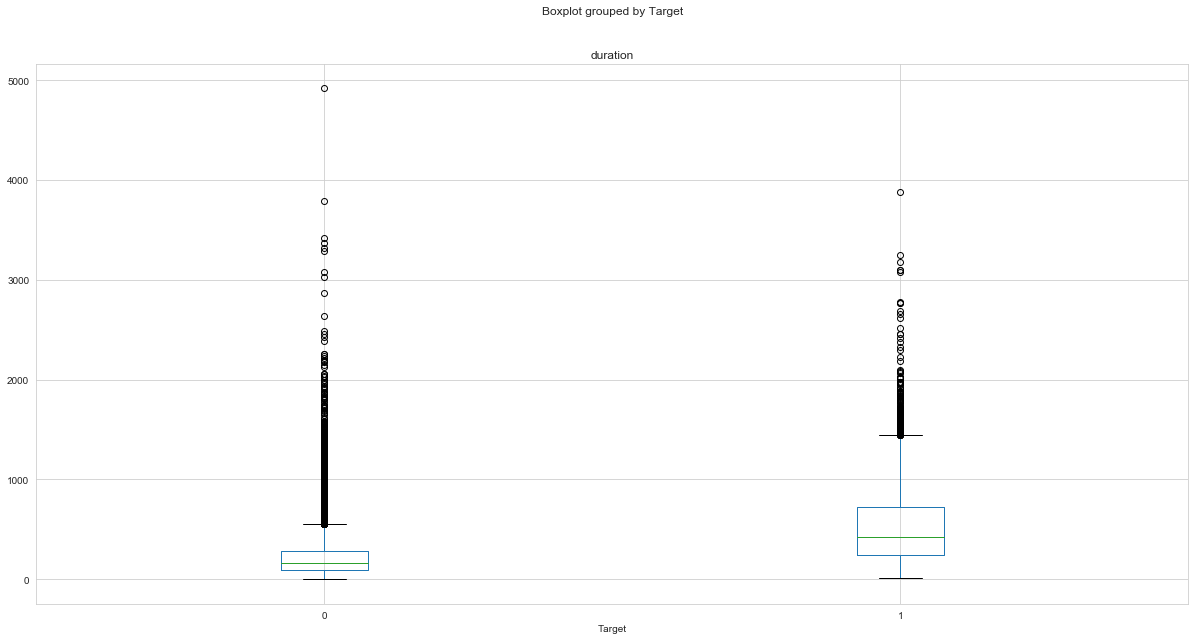

In [110]:
#Let's check for durarion outliers. Without removing balance outliers.
final_df.boxplot(by='Target',column=['duration'],figsize=(20,10))
print(f'max of duration where target is 1 : {final_df.duration[final_df.Target == 1].max()}')
print(f'max of duration where target is 0 : {final_df.duration[final_df.Target == 0].max()}')
print(f'min of duration where target is 1 : {final_df.duration[final_df.Target == 1].min()}')
print(f'min of duration where target is 0 : {final_df.duration[final_df.Target == 0].min()}')
print(f'Describe : \n{final_df.duration.describe()}')

max of duration where target is 1 : 1817
max of duration where target is 0 : 1823
min of duration where target is 1 : 8
min of duration where target is 0 : 0
Describe : 
count    43836.000000
mean       254.934666
std        238.231820
min          0.000000
25%        104.000000
50%        181.000000
75%        318.000000
max       1823.000000
Name: duration, dtype: float64


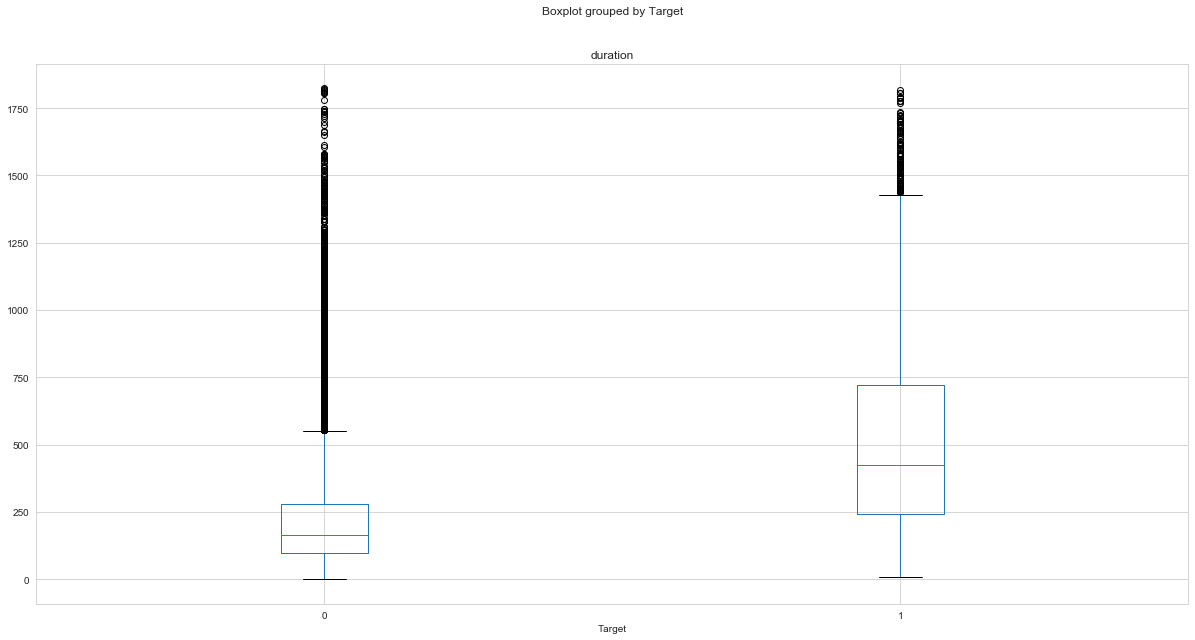

In [109]:
#Let's check for durarion outliers. With removing balance outliers
final_df_balance_out.boxplot(by='Target',column=['duration'],figsize=(20,10))
print(f'max of duration where target is 1 : {final_df_balance_out.duration[final_df_balance_out.Target == 1].max()}')
print(f'max of duration where target is 0 : {final_df_balance_out.duration[final_df_balance_out.Target == 0].max()}')
print(f'min of duration where target is 1 : {final_df_balance_out.duration[final_df_balance_out.Target == 1].min()}')
print(f'min of duration where target is 0 : {final_df_balance_out.duration[final_df_balance_out.Target == 0].min()}')
print(f'Describe : \n{final_df_balance_out.duration.describe()}')

In [114]:
# Let's check for IQR between 5% to 95%.
# Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier.
duration_percent_5 = final_df_balance_out.quantile(0.05)
duration_percent_95= final_df_balance_out.quantile(0.95)
IQR = duration_percent_95-duration_percent_5
# print('IQR\n',IQR)
# print(f'\n============\nMIN\n{(duration_percent_5 - 1.5 * IQR)}')
# print(f'\n============\nMAX\n{(duration_percent_95 + 1.5 * IQR)}')

In [115]:
final_df_duration_out = final_df_balance_out[~((final_df_balance_out < (duration_percent_5 - 1.5 * IQR)) |(final_df_balance_out > (duration_percent_95 + 1.5 * IQR))).any(axis=1)]
print(final_df_duration_out.shape,final_df_balance_out.shape,final_df.shape)
print(final_df_duration_out.shape[0]/final_df_balance_out.shape[0] *100)

(43629, 17) (43836, 17) (45211, 17)
99.5277853818779


* after comapring boxplot of duration data before removing balance outliers,
* we can see that there is no big defference in data shape.
* I go with final_balance_out data. because we almost removed duratin outliers, while removing banlance outliers.
* and we can consider rest of outliers as "natural error".

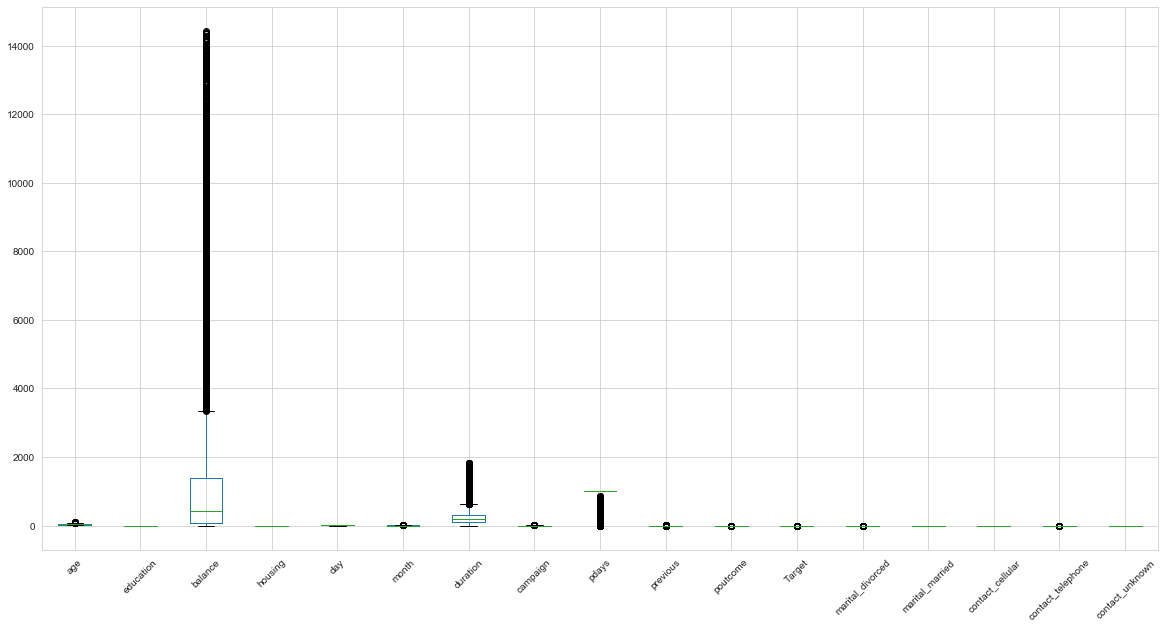

In [117]:
#After removing outliers from balance
final_df_balance_out.boxplot(figsize=(20,10),rot=45)

# SMOTE 

In [118]:
X = final_df_balance_out.drop(columns=['Target'])
y = final_df_balance_out.Target

In [119]:
# Here, I am using over smapling technique to increase or match the minority labels with majority labels.
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_res, y_res = smote.fit_resample(X,y)

### Train, Test and split

In [120]:
# Here I am splitting data in to train and testing data in the ratio of 70:30
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,train_size=0.7, test_size=0.3, random_state=42)

In [156]:
X_test_data = pd.DataFrame(X_test,columns=X.columns)
y_test_data = pd.DataFrame(y_test,columns=['Target'])
smote_test_df = pd.concat([X_test_data,y_test_data],axis=1)
print(smote_test_df.shape)
smote_test_df.head(20)

(23277, 17)


,age,education,balance,housing,day,month,duration,campaign,pdays,previous,poutcome,marital_divorced,marital_married,contact_cellular,contact_telephone,contact_unknown,Target
0,0.293333,1.000000,0.004804,0.0,0.533333,0.363636,0.205705,0.000000,1.000000,0.000000,0.0,0.0,1.0,1.0,0.0,0.0,0
1,0.466667,0.333333,0.040521,1.0,0.333333,0.454545,0.221064,0.000000,0.092184,0.142857,0.5,0.0,1.0,1.0,0.0,0.0,1
2,0.320000,0.333333,0.065167,1.0,0.966667,0.636364,0.510697,0.000000,1.000000,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,1
3,0.306667,0.333333,0.090162,1.0,0.466667,0.090909,0.138782,0.117647,0.415832,0.142857,0.0,0.0,0.0,1.0,0.0,0.0,1
4,0.240000,0.666667,0.055002,0.0,0.266667,0.090909,0.553483,0.000000,1.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1
5,0.120000,0.333333,0.044489,0.0,0.833333,0.000000,0.347230,0.000000,1.000000,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0
6,0.346667,0.333333,0.095941,0.0,0.233333,0.000000,0.140976,0.058824,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0
7,0.533333,0.333333,0.232403,0.0,0.200000,0.636364,0.198574,0.058824,0.770541,0.285714,0.0,0.0,0.0,0.0,0.0,0.0,1
8,0.440000,0.333333,0.198357,0.0,0.566667,0.363636,0.610532,0.176471,1.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1
9,0.413333,0.333333,0.220706,1.0,0.600000,0.181818,0.100384,0.000000,1.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,1


In [134]:
#MinMaxScale: It rescale the data in to 0,1. And it preserves the shape of original dirtribution.
minMaxScale = MinMaxScaler()
X_train_scaled = minMaxScale.fit_transform(X_train)
X_test_scaled = minMaxScale.fit_transform(X_test)

## Common code

In [123]:
ns_probs = [0 for _ in range(len(y_test))]

In [171]:
def drawROC_Curve(y_true,y_pred,model_name):
    plt.figure(figsize=(10,5))
    roc_score = roc_auc_score(y_true,y_pred)
    ns_fpr,ns_tpr, ns_threshold = roc_curve(y_true,ns_probs)
    fpr,tpr, threshold = roc_curve(y_true,y_pred)
    plt.plot(ns_fpr,ns_tpr,linestyle='--', label="No skill")
    plt.plot(fpr,tpr,linestyle='solid',label=f'Model name: {model_name} and roc_Score is: {np.round(roc_score,4)}')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.legend()

In [163]:
def printConfusionMatrix(y_true,y_pred):
    cm = confusion_matrix(y_true,y_pred)
    report = classification_report(y_true,y_pred)
    print(f'Confusion Matrix:\n{cm} \n')
    print(f'Classidfication Report: {report}')
    cm_df = pd.DataFrame(cm,index=[i for i in '01'], columns= [i for i in '01'])
    sns.heatmap(cm_df,annot=True)
    return cm

In [169]:
def printConfiInterval(confution_matrix):
    TP = confution_matrix[1,1]
    total_positive = len(smote_test_df.loc[smote_test_df['Target'] == 1])
    alpha = 0.05
    lower,upper = proportion_confint(TP,total_positive,alpha)
    print(f'TP: {TP} \t total_positive: {total_positive}')
    print(f'Lower: {lower} \t Upper: {upper}')

### 

# Lets build ensemble model

### Random forest classifcation model

In [129]:
from sklearn.ensemble import RandomForestClassifier

In [256]:
RF_model_basic = RandomForestClassifier()
RF_model_basic.fit(X_train_scaled,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [257]:
# predict score on train data
# Building model without hyperparameter tunning.
RF_train_prediction = RF_model_basic.predict(X_train)
score = np.round(accuracy_score(y_train,RF_train_prediction),4)
print(f'RF train Score:{score}')
print(f'Cross vailidation score: {cross_val_score(RF_model_basic,X_train_scaled,y_train,cv=10).mean()}')

RF train Score:0.9965
Cross vailidation score: 0.917549066098678


In [320]:
# predict score on test data
# Building model without hyperparameter tunning.
RF_test_prediction = RF_model_basic.predict(X_test_scaled)
score = np.round(accuracy_score(y_test,RF_test_prediction),4)
print(f'Cross vailidation score: {cross_val_score(RF_model_basic,X_test_scaled,y_test,cv=10).mean()}')
print(f'RF test Score:{score}')

Cross vailidation score: 0.8964208413568405
RF test Score:0.9185


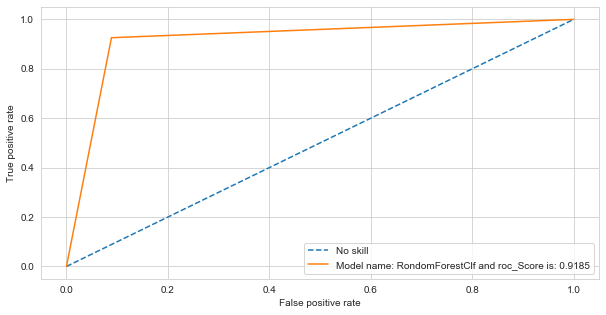

In [259]:
# ROC without parameter tunning
drawROC_Curve(y_test,RF_test_prediction,'RondomForestClf')

Confusion Matrix:
[[10576  1030]
 [  867 10804]] 

Classidfication Report:               precision    recall  f1-score   support

           0       0.92      0.91      0.92     11606
           1       0.91      0.93      0.92     11671

    accuracy                           0.92     23277
   macro avg       0.92      0.92      0.92     23277
weighted avg       0.92      0.92      0.92     23277



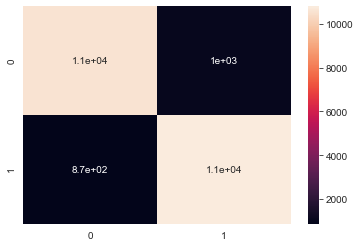

In [260]:
#Confusion matrix and classification report without hyper paramter tunning.
rf_cm = printConfusionMatrix(y_test,RF_test_prediction)

In [261]:
# confidence range 95% of RandomForestClf model without hyperparameter tunning.
printConfiInterval(rf_cm)

TP: 10804 	 total_positive: 11671
Lower: 0.9209557075987801 	 Upper: 0.9304709053735444


### GrdiserachCv for RandomForest

In [262]:
# Create n_estimators
n_estimators = range(1,20)
# Create criterion for quality of split. 
criterion = ['gini','entropy']
# Create maxDepth tree
max_depth = range(1,5)
# create min_samples_leaf
min_samples_leaf = range(1,10)
# create max_features
max_features = range(1,16)

# Create hyperparameter options
hyperparameters = dict(n_estimators=n_estimators, 
                       criterion=criterion,
                       max_depth=max_depth,
                       max_features=max_features
                      )
print(hyperparameters)

{'n_estimators': range(1, 20), 'criterion': ['gini', 'entropy'], 'max_depth': range(1, 5), 'max_features': range(1, 16)}


In [241]:
rf_gs_model = GridSearchCV(RF_model_basic, param_grid = hyperparameters, cv = 5, verbose=True,n_jobs=30)
# Fit on data
rf_best_model = rf_gs_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 2280 candidates, totalling 11400 fits


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done 297 tasks      | elapsed:   16.3s
[Parallel(n_jobs=30)]: Done 559 tasks      | elapsed:   34.3s
[Parallel(n_jobs=30)]: Done 909 tasks      | elapsed:  1.0min
[Parallel(n_jobs=30)]: Done 1359 tasks      | elapsed:  1.8min
[Parallel(n_jobs=30)]: Done 1909 tasks      | elapsed:  2.6min
[Parallel(n_jobs=30)]: Done 2559 tasks      | elapsed:  4.0min
[Parallel(n_jobs=30)]: Done 3309 tasks      | elapsed:  5.5min
[Parallel(n_jobs=30)]: Done 4159 tasks      | elapsed:  8.1min
[Parallel(n_jobs=30)]: Done 5109 tasks      | elapsed: 10.6min
[Parallel(n_jobs=30)]: Done 6159 tasks      | elapsed: 13.9min
[Parallel(n_jobs=30)]: Done 7309 tasks      | elapsed: 16.0min
[Parallel(n_jobs=30)]: Done 8559 tasks      | elapsed: 19.4min
[Parallel(n_jobs=30)]: Done 9909 tasks      | elapsed: 24.0min
[Parallel(n_jobs=30)]: Done 11400 out of 11400 | elapsed: 30.4min finished


In [265]:
# View best hyperparameters for RandomForestClf
best_n_estimators = rf_best_model.best_estimator_.get_params()['n_estimators']
best_criterion = rf_best_model.best_estimator_.get_params()['criterion']
best_max_depth = rf_best_model.best_estimator_.get_params()['max_depth']
best_max_features = rf_best_model.best_estimator_.get_params()['max_features']
print('Best n_estimators:', rf_best_model.best_estimator_.get_params()['n_estimators'])
print('Best criterion:', rf_best_model.best_estimator_.get_params()['criterion'])
print('Best max_depth:', rf_best_model.best_estimator_.get_params()['max_depth'])
print('Best max_features:', rf_best_model.best_estimator_.get_params()['max_features'])

Best n_estimators: 12
Best criterion: entropy
Best max_depth: 4
Best max_features: 3


In [268]:
RF_model_GS = RandomForestClassifier(n_estimators=best_n_estimators,
                                     criterion=best_criterion,
                                     max_depth=best_max_depth,
                                     max_features=best_max_features
                                    )
RF_model_GS.fit(X_train_scaled,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=12,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [323]:
# predict score on train data
# Building model with hyperparameter tunning.
RF_train_prediction_gs = RF_model_GS.predict(X_train_scaled)
score = np.round(accuracy_score(y_train,RF_train_prediction_gs),4)
print(f'Cross vailidation score: {cross_val_score(RF_model_GS,X_train_scaled,y_train,cv=10).mean()}')
print(f'RF train Score:{score}')

Cross vailidation score: 0.8297942648539692
RF train Score:0.8312


In [322]:
# predict score on test data
# Building model with hyperparameter tunning.
RF_test_prediction_gs = RF_model_GS.predict(X_test_scaled)
score = np.round(accuracy_score(y_test,RF_test_prediction_gs),4)
print(f'Cross vailidation score: {cross_val_score(RF_model_GS,X_test_scaled,y_test,cv=10).mean()}')
print(f'RF train Score:{score}')

Cross vailidation score: 0.8307345205119517
RF train Score:0.8271


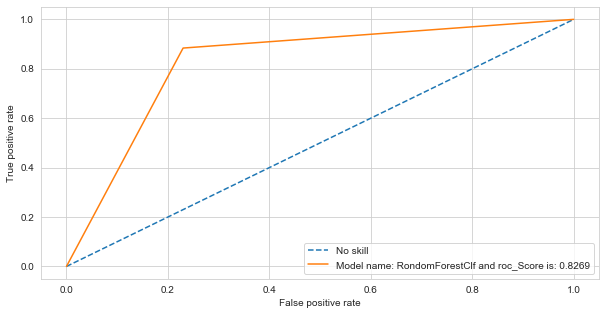

In [271]:
# ROC with parameter tunning
drawROC_Curve(y_test,RF_test_prediction_gs,'RondomForestClf')

Confusion Matrix:
[[ 8937  2669]
 [ 1356 10315]] 

Classidfication Report:               precision    recall  f1-score   support

           0       0.87      0.77      0.82     11606
           1       0.79      0.88      0.84     11671

    accuracy                           0.83     23277
   macro avg       0.83      0.83      0.83     23277
weighted avg       0.83      0.83      0.83     23277



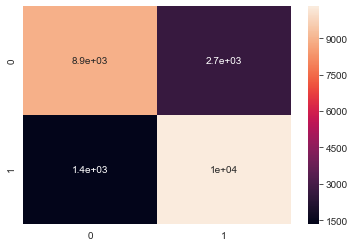

In [272]:
#Confusion matrix and classification report with hyper paramter tunning.
rf_cm_gs = printConfusionMatrix(y_test,RF_test_prediction_gs)

In [273]:
# confidence range 95% of RandomForestClf model with hyperparameter tunning.
printConfiInterval(rf_cm_gs)

TP: 10315 	 total_positive: 11671
Lower: 0.8780009121913547 	 Upper: 0.8896282541183017


* Before using gridsearchcv parameter tuning the model accuracy was 0.91
* and after using gridsearchcv the accuracy got dropped 0.82. which is big difference in accuracy of model.
* But as per my consideration second model is good. Because I have used pruning method. 

### Bagging classifcation model

In [218]:
from sklearn.ensemble import BaggingClassifier

In [221]:
bagging_basic_model = BaggingClassifier()
bagging_basic_model.fit(X_train_scaled,y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [324]:
# predict score on train data
# Building model without hyperparameter tunning.
bagging_train_pred = bagging_basic_model.predict(X_train_scaled)
score = np.round(accuracy_score(y_train,bagging_train_pred),4)
print(f'Bagging Classifier train Score:{score}')
print(f'Cross vailidation score: {cross_val_score(bagging_basic_model,X_train_scaled,y_train,cv=10).mean()}')

Bagging Classifier train Score:0.9959
Cross vailidation score: 0.9162049542919813


In [325]:
# predict score on test data
# Building model without hyperparameter tunning.
bagging_test_pred = bagging_basic_model.predict(X_test_scaled)
score = np.round(accuracy_score(y_test,bagging_test_pred),4)
print(f'Bagging Classifier test Score:{score}')
print(f'Cross vailidation score: {cross_val_score(bagging_basic_model,X_test_scaled,y_test,cv=10).mean()}')

Bagging Classifier test Score:0.9193
Cross vailidation score: 0.8989992683419024


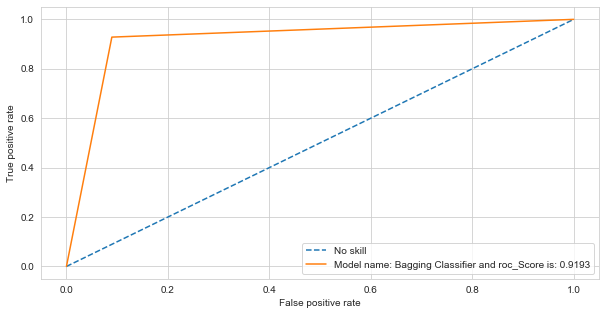

In [228]:
# ROC without parameter tunning
drawROC_Curve(y_test,bagging_test_pred,'Bagging Classifier')

Confusion Matrix:
[[10567  1039]
 [  839 10832]] 

Classidfication Report:               precision    recall  f1-score   support

           0       0.93      0.91      0.92     11606
           1       0.91      0.93      0.92     11671

    accuracy                           0.92     23277
   macro avg       0.92      0.92      0.92     23277
weighted avg       0.92      0.92      0.92     23277



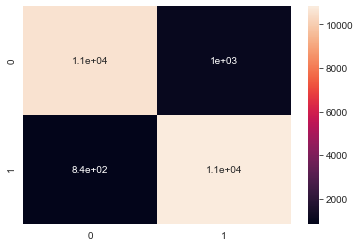

In [229]:
#Confusion matrix and classification report without hyper paramter tunning.
bagging_clf_cm = printConfusionMatrix(y_test,bagging_test_pred)

In [230]:
# confidence range 95% of Bagging Classifier model without hyperparameter tunning.
printConfiInterval(bagging_clf_cm)

TP: 10832 	 total_positive: 11671
Lower: 0.9234262102758621 	 Upper: 0.9327986205012777


#### Bagging classifier with Gridsearch

In [231]:
# Create n_estimators
n_estimators = range(1,20)
# Create max_samples
max_samples = range(1,20)
# create min_samples_leaf
max_features = range(1,16)

# Create hyperparameter options
hyperparameters = dict(n_estimators=n_estimators, 
                       max_samples=max_samples,
                       max_features=max_features
                      )
print(hyperparameters)

{'n_estimators': range(1, 20), 'max_samples': range(1, 20), 'max_features': range(1, 16)}


In [232]:
bagging_gs_model = GridSearchCV(bagging_basic_model, param_grid = hyperparameters, cv = 2, verbose=True,n_jobs=30)
# Fit on data
bagging_best_model = bagging_gs_model.fit(X_train_scaled, y_train)

Fitting 2 folds for each of 5415 candidates, totalling 10830 fits


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done 140 tasks      | elapsed:   19.9s
[Parallel(n_jobs=30)]: Done 390 tasks      | elapsed:   28.8s
[Parallel(n_jobs=30)]: Done 740 tasks      | elapsed:   43.8s
[Parallel(n_jobs=30)]: Done 1190 tasks      | elapsed:  1.0min
[Parallel(n_jobs=30)]: Done 1740 tasks      | elapsed:  1.4min
[Parallel(n_jobs=30)]: Done 2390 tasks      | elapsed:  1.9min
[Parallel(n_jobs=30)]: Done 3140 tasks      | elapsed:  2.5min
[Parallel(n_jobs=30)]: Done 3990 tasks      | elapsed:  3.3min
[Parallel(n_jobs=30)]: Done 4940 tasks      | elapsed:  4.2min
[Parallel(n_jobs=30)]: Done 5990 tasks      | elapsed:  5.3min
[Parallel(n_jobs=30)]: Done 7140 tasks      | elapsed:  6.5min
[Parallel(n_jobs=30)]: Done 8390 tasks      | elapsed:  8.1min
[Parallel(n_jobs=30)]: Done 9740 tasks      | elapsed:  9.9min
[Parallel(n_jobs=30)]: Done 10830 out of 10830 | elapsed: 11.4min finished


In [276]:
# View best hyperparameters for Bagging Classifier
bagging_best_n_estimators = bagging_gs_model.best_estimator_.get_params()['n_estimators']
bagging_best_max_samples = bagging_gs_model.best_estimator_.get_params()['max_samples']
bagging_best_max_features = bagging_gs_model.best_estimator_.get_params()['max_features']
print('Best n_estimators:', bagging_gs_model.best_estimator_.get_params()['n_estimators'])
print('Best max_samples:', bagging_gs_model.best_estimator_.get_params()['max_samples'])
print('Best max_features:', bagging_gs_model.best_estimator_.get_params()['max_features'])

Best n_estimators: 18
Best max_samples: 16
Best max_features: 14


In [277]:
bagging_basic_model_gs = BaggingClassifier(n_estimators=bagging_best_n_estimators,
                                           max_samples=bagging_best_max_samples,
                                           max_features=bagging_best_max_features)
bagging_basic_model_gs.fit(X_train_scaled,y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=14, max_samples=16, n_estimators=18, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [326]:
# predict score on train data
# Building model with hyperparameter tunning.
bagging_train_pred_gs = bagging_basic_model_gs.predict(X_train_scaled)
score = np.round(accuracy_score(y_train,bagging_train_pred_gs),4)
print(f'Cross vailidation score: {cross_val_score(bagging_basic_model_gs,X_train_scaled,y_train,cv=10).mean()}')
print(f'Bagging Classifier train Score:{score}')

Cross vailidation score: 0.7776153966731474
Bagging Classifier train Score:0.7821


In [327]:
# predict score on test data
# Building model with hyperparameter tunning.
bagging_test_pred_gs = bagging_basic_model_gs.predict(X_test_scaled)
score = np.round(accuracy_score(y_test,bagging_test_pred_gs),4)
print(f'Cross vailidation score: {cross_val_score(bagging_basic_model_gs,X_test_scaled,y_test,cv=10).mean()}')
print(f'Bagging Classifier test Score:{score}')

Cross vailidation score: 0.7713206939835615
Bagging Classifier test Score:0.7812


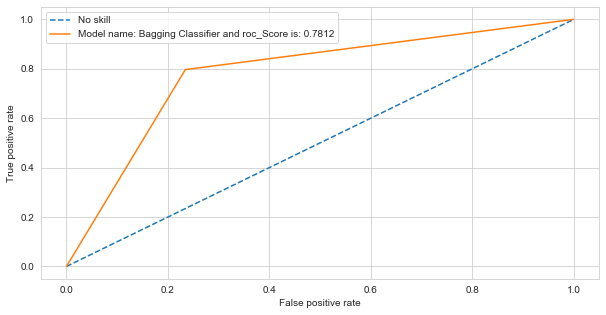

In [281]:
# ROC with parameter tunning
drawROC_Curve(y_test,bagging_test_pred_gs,'Bagging Classifier')

Confusion Matrix:
[[8885 2721]
 [2372 9299]] 

Classidfication Report:               precision    recall  f1-score   support

           0       0.79      0.77      0.78     11606
           1       0.77      0.80      0.79     11671

    accuracy                           0.78     23277
   macro avg       0.78      0.78      0.78     23277
weighted avg       0.78      0.78      0.78     23277



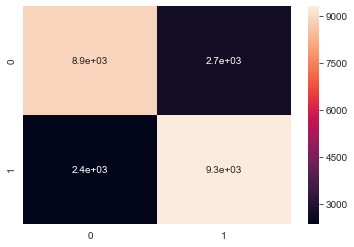

In [318]:
#Confusion matrix and classification report with hyper paramter tunning.
bagging_clf_cm_gs = printConfusionMatrix(y_test,bagging_test_pred_gs)

In [319]:
# confidence range 95% of Bagging Classifier model with hyperparameter tunning.
printConfiInterval(bagging_clf_cm_gs)

TP: 9299 	 total_positive: 11671
Lower: 0.7894605542395484 	 Upper: 0.804061851723951


* Before using gridsearchcv parameter tuning the model accuracy was 0.9193
* and after using gridsearchcv the accuracy got dropped 0.78. which is big difference in accuracy of model.
* But as per my consideration second model is good. Because I have used pruning method. 

### Boosting classifier

In [284]:
from sklearn.ensemble import GradientBoostingClassifier

In [287]:
boosting_basic_model = GradientBoostingClassifier()
boosting_basic_model.fit(X_train_scaled,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [328]:
# predict score on train data
# Building model without hyperparameter tunning.
bagging_train_pred = boosting_basic_model.predict(X_train_scaled)
score = np.round(accuracy_score(y_train,bagging_train_pred),4)
print(f'Cross vailidation score: {cross_val_score(boosting_basic_model,X_train_scaled,y_train,cv=10).mean()}')
print(f'Boosting Classifier train Score:{score}')

Cross vailidation score: 0.8828048085457965
Boosting Classifier train Score:0.8862


In [329]:
# predict score on test data
# Building model without hyperparameter tunning.
boosting_test_pred = boosting_basic_model.predict(X_test_scaled)
score = np.round(accuracy_score(y_test,boosting_test_pred),4)
print(f'Cross vailidation score: {cross_val_score(boosting_basic_model,X_test_scaled,y_test,cv=10).mean()}')
print(f'Boosting Classifier test Score:{score}')

Cross vailidation score: 0.8801829702421919
Boosting Classifier test Score:0.8815


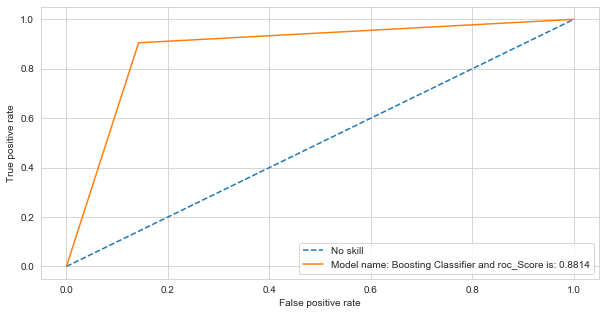

In [290]:
# ROC without parameter tunning
drawROC_Curve(y_test,boosting_test_pred,'Boosting Classifier')

Confusion Matrix:
[[ 9955  1651]
 [ 1107 10564]] 

Classidfication Report:               precision    recall  f1-score   support

           0       0.90      0.86      0.88     11606
           1       0.86      0.91      0.88     11671

    accuracy                           0.88     23277
   macro avg       0.88      0.88      0.88     23277
weighted avg       0.88      0.88      0.88     23277



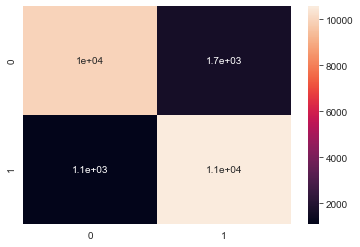

In [306]:
#Confusion matrix and classification report without hyper paramter tunning.
boosting_clf_cm = printConfusionMatrix(y_test,boosting_test_pred)

In [307]:
# confidence range 95% of Boosting Classifier model without hyperparameter tunning.
printConfiInterval(boosting_clf_cm)

TP: 10564 	 total_positive: 11671
Lower: 0.8998336502707013 	 Upper: 0.9104653815174916


#### GridsearchCV for GradientBoosting

In [299]:
# Create n_estimators
n_estimators = range(1,20)
# Create maxDepth tree
max_depth = range(1,5)
# create max_features
max_features = range(1,16)
# create learning_rate
learning_rate = range(1, 10)

# Create hyperparameter options
hyperparameters = dict(n_estimators=n_estimators, 
                       max_depth=max_depth,
                       max_features=max_features,
                       learning_rate=learning_rate
                      )
print(hyperparameters)

{'n_estimators': range(1, 20), 'max_depth': range(1, 5), 'max_features': range(1, 16), 'learning_rate': range(1, 10)}


In [300]:
gb_best_model = GridSearchCV(boosting_basic_model,param_grid=hyperparameters,cv=2,verbose=2,n_jobs=30)
gb_best_model.fit(X_train_scaled,y_train)

Fitting 2 folds for each of 10260 candidates, totalling 20520 fits


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:   22.7s
[Parallel(n_jobs=30)]: Done 305 tasks      | elapsed:   38.7s
[Parallel(n_jobs=30)]: Done 588 tasks      | elapsed:  1.1min
[Parallel(n_jobs=30)]: Done 953 tasks      | elapsed:  1.8min
[Parallel(n_jobs=30)]: Done 1398 tasks      | elapsed:  2.8min
[Parallel(n_jobs=30)]: Done 1925 tasks      | elapsed:  4.3min
[Parallel(n_jobs=30)]: Done 2532 tasks      | elapsed:  6.1min
[Parallel(n_jobs=30)]: Done 3221 tasks      | elapsed:  7.3min
[Parallel(n_jobs=30)]: Done 3990 tasks      | elapsed:  9.3min
[Parallel(n_jobs=30)]: Done 4841 tasks      | elapsed: 11.7min
[Parallel(n_jobs=30)]: Done 5772 tasks      | elapsed: 13.4min
[Parallel(n_jobs=30)]: Done 6785 tasks      | elapsed: 16.7min
[Parallel(n_jobs=30)]: Done 7878 tasks      | elapsed: 18.7min
[Parallel(n_jobs=30)]: Done 9053 tasks      | elapsed: 22.4min
[Parallel(n_jobs=30)]: Done 10308 tasks      

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort=

In [301]:
# View best hyperparameters for Boosting Classifier
boosting_best_n_estimators = gb_best_model.best_estimator_.get_params()['n_estimators']
boosting_best_max_depth = gb_best_model.best_estimator_.get_params()['max_depth']
boosting_best_max_features = gb_best_model.best_estimator_.get_params()['max_features']
boosting_best_learning_rate = gb_best_model.best_estimator_.get_params()['learning_rate']
print('Best n_estimators:', gb_best_model.best_estimator_.get_params()['n_estimators'])
print('Best max_depth:', gb_best_model.best_estimator_.get_params()['max_depth'])
print('Best max_features:', gb_best_model.best_estimator_.get_params()['max_features'])
print('Best learning_rate:', gb_best_model.best_estimator_.get_params()['learning_rate'])

Best n_estimators: 19
Best max_depth: 4
Best max_features: 14
Best learning_rate: 1


In [302]:
boosting_gs_model = GradientBoostingClassifier(n_estimators=boosting_best_n_estimators,
                                               max_depth=boosting_best_max_depth,
                                               max_features=boosting_best_max_features,
                                               learning_rate=boosting_best_learning_rate
                                              )
boosting_gs_model.fit(X_train_scaled,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None, learning_rate=1,
                           loss='deviance', max_depth=4, max_features=14,
                           max_leaf_nodes=None, min_impurity_decrease=0.0,
                           min_impurity_split=None, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=19, n_iter_no_change=None,
                           presort='auto', random_state=None, subsample=1.0,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [330]:
# predict score on train data
# Building model with hyperparameter tunning.
bagging_train_pred_gs = boosting_gs_model.predict(X_train_scaled)
score = np.round(accuracy_score(y_train,bagging_train_pred_gs),4)
print(f'Cross vailidation score: {cross_val_score(boosting_gs_model,X_train_scaled,y_train,cv=10).mean()}')
print(f'Boosting Classifier train Score:{score}')

Cross vailidation score: 0.8950310096556366
Boosting Classifier train Score:0.9042


In [331]:
# predict score on test data
# Building model with hyperparameter tunning.
boosting_test_pred_gs = boosting_gs_model.predict(X_test_scaled)
score = np.round(accuracy_score(y_test,boosting_test_pred_gs),4)
print(f'Cross vailidation score: {cross_val_score(boosting_gs_model,X_test_scaled,y_test,cv=10).mean()}')
print(f'Boosting Classifier test Score:{score}')

Cross vailidation score: 0.8906640705960326
Boosting Classifier test Score:0.8922


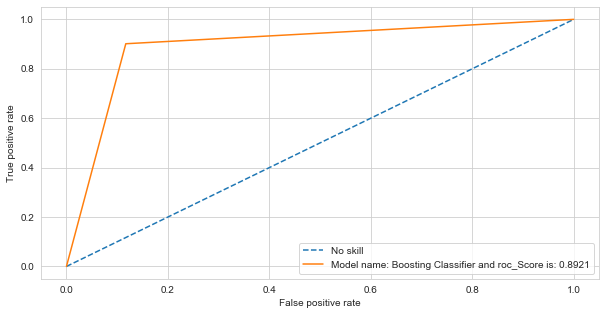

In [332]:
# ROC without parameter tunning
drawROC_Curve(y_test,boosting_test_pred_gs,'Boosting Classifier')

Confusion Matrix:
[[10248  1358]
 [ 1152 10519]] 

Classidfication Report:               precision    recall  f1-score   support

           0       0.90      0.88      0.89     11606
           1       0.89      0.90      0.89     11671

    accuracy                           0.89     23277
   macro avg       0.89      0.89      0.89     23277
weighted avg       0.89      0.89      0.89     23277



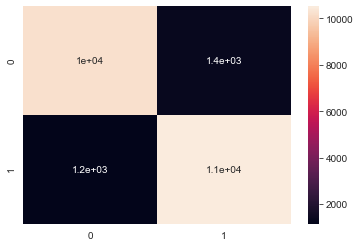

In [333]:
#Confusion matrix and classification report with hyper paramter tunning.
boosting_clf_cm_gs = printConfusionMatrix(y_test,boosting_test_pred_gs)

In [317]:
# confidence range 95% of Boosting Classifier model without hyperparameter tunning.
printConfiInterval(boosting_clf_cm_gs)

TP: 10519 	 total_positive: 11671
Lower: 0.8958825320361636 	 Upper: 0.9067050782800046


* Before and after using gridsearchcv parameter tuning the model accuracy were 0.88 and 0.89. We can see that there is no big difference.
* And, here I was checking how the learning rate effects on n_estimators , meaning trade of between both.

## Regressor

* A classification algorithm may predict a continuous value, but the continuous value is in the form of a probability for a class label.
* A regression algorithm may predict a discrete value, but the discrete value in the form of an integer quantity.
* Here we are dealing with classifcation data.

In [359]:
from sklearn.metrics import mean_squared_error
import math

In [337]:
from sklearn.ensemble import RandomForestRegressor

In [338]:
RF_reg_model = RandomForestRegressor()
RF_reg_model.fit(X_train_scaled,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [364]:
RF_reg_pred_train = RF_reg_model.predict(X_train_scaled)
rmse = math.sqrt(mean_squared_error(y_train,RF_reg_pred_train))
score = np.round(RF_reg_model.score(X_train_scaled,y_train))
print(f'RF regressor train Score:{score} and RMSE: {rmse}')

RF regressor train Score:1.0 and RMSE: 0.10709092673292138


In [365]:
RF_reg_pred_test = RF_reg_model.predict(X_test_scaled)
rmse = math.sqrt(mean_squared_error(y_test,RF_reg_pred_test))
score = np.round(RF_reg_model.score(X_test_scaled,y_test))
print(f'RF regressor test Score:{score} and RMSE: {rmse}')

RF regressor test Score:1.0 and RMSE: 0.24891244304911406


In [346]:
from sklearn.ensemble import GradientBoostingRegressor

In [347]:
GB_reg_model = GradientBoostingRegressor()
GB_reg_model.fit(X_train_scaled,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [366]:
GB_reg_pred_train = GB_reg_model.predict(X_train_scaled)
rmse = math.sqrt(mean_squared_error(y_train,GB_reg_pred_train))
score = np.round(GB_reg_model.score(X_train_scaled,y_train))
print(f'GB regressor train Score:{score} and RMSE: {rmse}')

GB regressor train Score:1.0 and RMSE: 0.2989823658617085


In [368]:
GB_reg_pred_test = GB_reg_model.predict(X_test_scaled)
rmse = math.sqrt(mean_squared_error(y_test,GB_reg_pred_test))
score = np.round(GB_reg_model.score(X_test_scaled,GB_reg_pred_test))
print(f'GB regressor test Score:{score} and RMSE {rmse}')

GB regressor test Score:1.0 and RMSE 0.30279592637692265


In [350]:
from sklearn.ensemble import BaggingRegressor

In [351]:
Bagging_reg_model = BaggingRegressor()
Bagging_reg_model.fit(X_train_scaled,y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [370]:
Bagging_reg_pred_train = Bagging_reg_model.predict(X_train_scaled)
rmse = math.sqrt(mean_squared_error(y_train,Bagging_reg_pred_train))
score = np.round(Bagging_reg_model.score(X_train_scaled,y_train))
print(f'Bagging regressor train Score:{score} and RMSE: {rmse}')

Bagging regressor train Score:1.0 and RMSE: 0.10688559266454513


In [369]:
Bagging_reg_pred_test = Bagging_reg_model.predict(X_test_scaled)
rmse = math.sqrt(mean_squared_error(y_test,Bagging_reg_pred_test))
score = np.round(Bagging_reg_model.score(X_test_scaled,y_test))
print(f'Bagging regressor test Score:{score} and RMSE {rmse}')

Bagging regressor test Score:1.0 and RMSE 0.25049804847687124


#####